## Final Project Submission

* **Student name:** Tiara Hlaing
* **Student pace:** Full Time
* **Scheduled project review date/time:** June 2019
* **Instructor name:** Joe San Pietro
* **Blog post URL:** https://thetiaramisu.wordpress.com/

## Introduction

[OkCupid](www.okcupid.com) is an online dating website that was founded in 2004. A description of their matching process can be found on their [Wikipedia](https://en.wikipedia.org/wiki/OkCupid) page:

   _"To generate matches, OkCupid applies data generated by users' activities on the site, as well as their answers to questions. When answering a question, a user indicates his or her own answer, the answers he or she would accept from partners, and the level of importance he or she places on the question. The results of these questions can be made public. OkCupid describes in detail the algorithm used to calculate match percentages. Assuming a user is a paid user ("A-List"), the site notifies a user if someone likes that user."_

The dataset I am using for this project was scraped on June 30th, 2012. It includes anonymized profile information for all active profiles at the time of the scrap within a 25-mile radius of San Francisco. Profiles were considered active if the account holder had logged in within the previous year and if they had at least one profile picture.

The dataset provides the answers provided by 59,946 active users for the different personal and preference questions asked by OkCupid when creating an online account. The full dataset can be found [here](https://github.com/rudeboybert/JSE_OkCupid), and the column descriptions are provided at [this link](https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook.txt) on the same github.

My objective in this project is to form a model based off of the data provided to predict whether a user profile belongs to a male or a female. An analysis of the trends in profile responses given by gender could be beneficial in determining how the company can better accommodate their user base.

## The OSEMN Framework

The OSEMN Framework is the data science process that will be used in this project. The process consists of the following steps.

1. **Obtain:** Understanding the details of the assignment, the objective in addressing the questions at hand, and obtaining the relevant data.
2. **Scrub:** Filtering through the collected data to get it to a useful and workable condition. This may include removing irrelevant or cumbersome data, and addressing the issues of messy values in the data set.
3. **Explore:** Taking steps to gain an understanding of the data set, such as creating visualizations to further explore the distributions and relationships amongst variables.
4. **Model:** Building and tuning models using machine learning algorithms to develop a final model that can make future predictions with confidence.
5. **iNterpret:** Drawing conclusions from the data, evaluating the meaning and implications of the findings, and communicating the results.

## Obtaining Data

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for previews

def view(df,n):
    with pd.option_context('display.max_rows',n*2):
        display(df)

### Loading and Previewing the Data

#### Preview

In [3]:
df = pd.read_csv('profiles.csv')

In [4]:
view(df,3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,"last book: ""game change"".<br />\nmovies: bourn...",- iphone<br />\n- friends and family<br />\n- ...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.,asian,71.0,100000,construction / craftsmanship,2012-06-27-23-37,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...,"asian, black",73.0,-1,medicine / health,2012-06-23-13-01,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but n

#### Column Descriptions

https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook.txt

* **age**: age

* **body_type**: rather not say, thin, overweight, skinny, average, fit, athletic, jacked, a little extra, curvy, full figured, used up

* **diet**: mostly/strictly; anything, vegetarian, vegan, kosher, halal, other

* **drinks**: very often, often, socially, rarely, desperately, not at all

* **drugs**: never, sometimes, often

* **education**: graduated from, working on, dropped out of; high school, two-year college, university, masters program, law school, med school, Ph.D program, space camp

* **ethnicity**: Asian, middle eastern, black, native American, indian, pacific islander, Hispanic/latin, white, other

* **height**: inches

* **income**: (US $, -1 means rather not say) -1, 20000, 30000, 40000, 50000, 60000 70000, 80000, 100000, 150000, 250000, 500000, 1000000,

* **job**: student, art/music/writing, banking/finance, administration, technology, construction, education, entertainment/media, management, hospitality, law, medicine, military, politics/government, sales/marketing, science/engineering, transportation, unemployed, other, rather not say, retire

* **last_online**: most recent log in to OkCupid profile

* **location**: city of residence

* **offspring**: has a kid, has kids, doesnt have a kid, doesn't want kids; ,and/,but might want them, wants them, doesnt want any, doesnt want more

* **orientation**: straight, gay, bisexual

* **pets**: has dogs, likes dogs, dislikes dogs; and has cats, likes cats, dislikes cats

* **religion**: agnosticism, atheism, Christianity, Judaism, Catholicism, Islam, Hinduism, Buddhism, Other; and very serious about it, and somewhat serious about it, but not too serious about it, and laughing about it

* **sex**: m, f

* **sign**: aquarius, pices, aries, Taurus, Gemini, cancer, leo, virgo, libra, scorpio, saggitarius, Capricorn; but it doesn’t matter, and it matters a lot, and it’s fun to think about

* **smokes**: yes, sometimes, when drinking, trying to quit, no

* **speaks**: English (fluently, okay, poorly). Afrikaans, Albanian, Arabic, Armenian, Basque, Belarusan, Bengali, Breton, Bulgarian, Catalan, Cebuano, Chechen, Chinese, C++, Croatian, Czech, Danish, Dutch, Esperanto, Estonian, Farsi, Finnish, French, Frisian, Georgian, German, Greek, Gujarati, Ancient Greek, Hawaiian, Hebrew, Hindi, Hungarian, Icelandic, Ilongo, Indonesian, Irish, Italian, Japanese, Khmer, Korean, Latin, Latvian, LISP, Lithuanian, Malay, Maori, Mongolian, Norwegian, Occitan, Other, Persian, Polish, Portuguese, Romanian, Rotuman, Russian, Sanskrit, Sardinian, Serbian, Sign Language, Slovak, Slovenian, Spanish, Swahili, Swedish, Tagalog, Tamil, Thai, Tibetan, Turkish, Ukranian, Urdu, Vietnamese, Welsh, Yiddish (fluently, okay, poorly)

* **status**: single, seeing someone, married, in an open relationship

* **essay0**: My self summary
* **essay1**: What I’m doing with my life
* **essay2**: I’m really good at
* **essay3**: The first thing people usually notice about me
* **essay4**: Favorite books, movies, show, music, and food
* **essay5**: The six things I could never do without
* **essay6**: I spend a lot of time thinking about
* **essay7**: On a typical Friday night I am
* **essay8**: The most private thing I am willing to admit
* **essay9**: You should message me if...

#### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

#### Describe

In [6]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### Column Values

AGE



18      309
19      611
20      953
21     1282
22     1934
       ... 
67       66
68       59
69       31
109       1
110       1
Name: age, Length: 54, dtype: int64

None


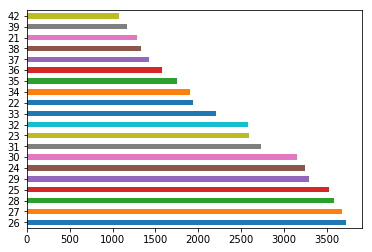


**************************************************

BODY_TYPE



a little extra     2629
athletic          11819
average           14652
curvy              3924
fit               12711
                  ...  
overweight          444
rather not say      198
skinny             1777
thin               4711
used up             355
Name: body_type, Length: 12, dtype: int64

None


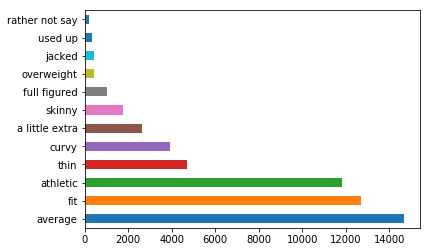


**************************************************

DIET



anything                6183
halal                     11
kosher                    11
mostly anything        16585
mostly halal              48
                       ...  
strictly other           452
strictly vegan           228
strictly vegetarian      875
vegan                    136
vegetarian               667
Name: diet, Length: 18, dtype: int64

None


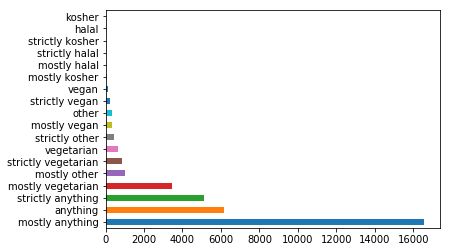


**************************************************

DRINKS



desperately      322
not at all      3267
often           5164
rarely          5957
socially       41780
very often       471
Name: drinks, dtype: int64

None


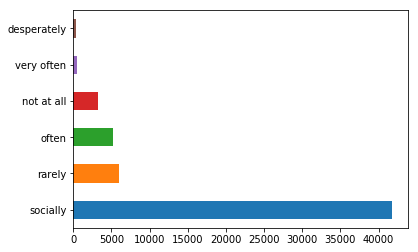


**************************************************

DRUGS



never        37724
often          410
sometimes     7732
Name: drugs, dtype: int64

None


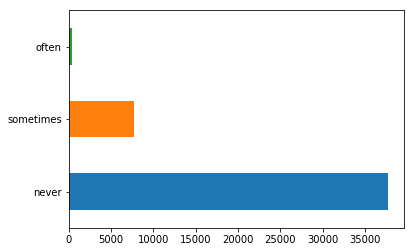


**************************************************

EDUCATION



college/university                    801
dropped out of college/university     995
dropped out of high school            102
dropped out of law school              18
dropped out of masters program        140
                                     ... 
working on masters program           1683
working on med school                 212
working on ph.d program               983
working on space camp                 445
working on two-year college          1074
Name: education, Length: 32, dtype: int64

None


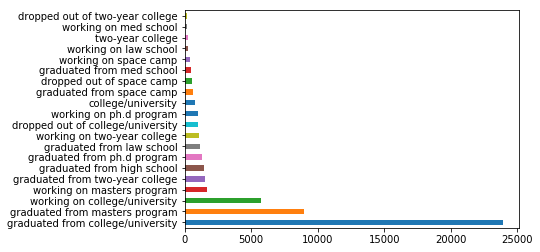


**************************************************

ESSAY0



! ! ! ! ! ! ! ! ! !young man.. into having fun , great sense of\nhumor and a great a goof... im on here becuz real life datin takes\ntoo much time... so why not pick up some of the worlds computer\nlove?? so here i am check out my myspace &amp; facebook by my email\njweems11@yahoo.com.. i cant wait to talk to yew.. wink...! ! ! ! !\n! ! !                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

None


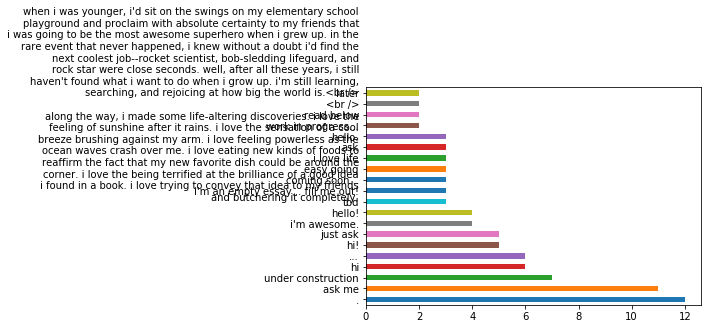


**************************************************

ESSAY1



! ! ! ! ! ! ! ! ! ! currently in school and working construction..\nmy school is for construction also but it not that bad keeps my\nbody toned and helps with stamina so get at me... ! ! ! ! ! !! ! !\n! ! ! ! !                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

None


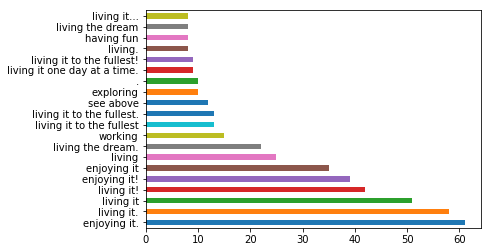


**************************************************

ESSAY2



! ! ! ! ! ! ! ! ! ! yew decide... am a all around cool guy i know\nalot but im always up to learning new things.. it keeps me active\nand my list of thhings that im good at is constantly growin..! ! !\n! ! ! ! ! ! ! ! ! ! ! ! !                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
!.) creating a warm, cozy, home environment that people are often\ncommenting on what a good feeling they get from it.<br />\n<br />\n2.) being open, sensual, responsive, creative and\ninteresting.<br />\n<br />\n3.) conflict resolution- in general, and using nvc (non violent\ncommunicatio

None


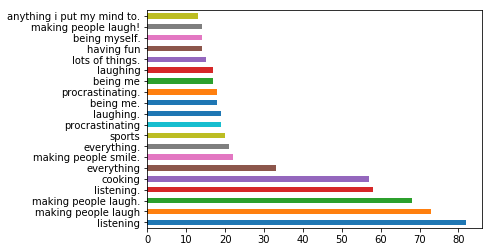


**************************************************

ESSAY3



!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

None


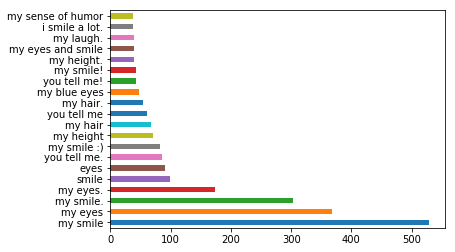


**************************************************

ESSAY4



! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !too many to specify.. but dean\nkoontz he's the greatest author ever.. i love movies like troy,\n300, those movie about ancient battles.. its a big interest of\nmine..! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

None


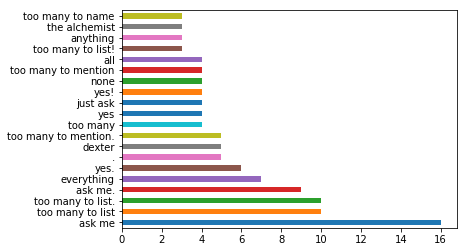


**************************************************

ESSAY5



! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !ice cream, music, cake, music\nvideos, friends and more ice cream. ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !\n! ! ! im big on sweets but im just jokin up there... really its\nmusic because my interest in music may be the same as urs. sunsets.\nsun sunsets are the most amazing things to watch and a romantic\nthing as well.. friends. without my friends id be incomplete\nfriends are the key to survival..    1
!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                1
!) music.<br />\n@) family.<br />\n#) yoga.<br />\n$) water.<br />\n%) sushi.<br />\n^) love.                                 

None


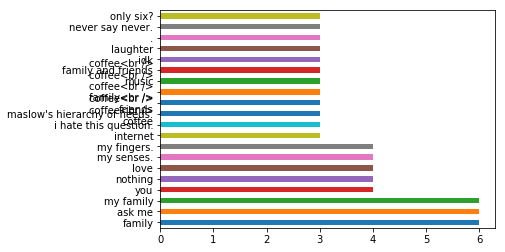


**************************************************

ESSAY6



! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !my mother... she passed when i was\n12years old and now i just have those days when shes on my mind\nalot..! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !                                                                                                                                                                                                                                                                                                                                                                             1
!) how to improve tacos<br />\n!) how to write this bullshit                                                                                                                                                                                                                                                                                                                                                                                                              

None


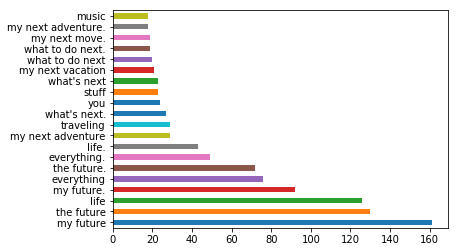


**************************************************

ESSAY7



! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! either sitting at home... or\nout with friends.. i dont party much and clubs are a waste of time\nnow... so i just watch tv or a movie.. ! ! ! ! ! ! ! ! ! ! ! ! ! !\n! ! ! ! !!    1
"...the same thing we do every night, pinky: try to take over the\nworld!"                                                                                                                                                1
"[doing] the same thing we do every night, pinky[trying] to take\nover the world!"                                                                                                                                        1
"any man who can drive safely while kissing a pretty girl is simply\nnot giving the kiss the attention it deserves" said albert\neinstein, the genius my father named me after                                            1
"as most san franciscans know, there is no such thing as a typical\nfriday night."                                      

None


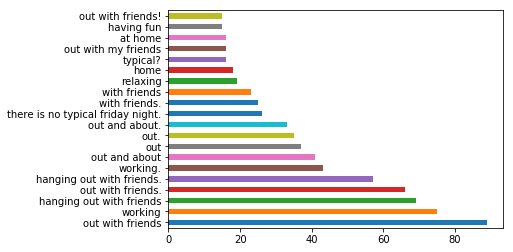


**************************************************

ESSAY8



!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2
!!!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                              

None


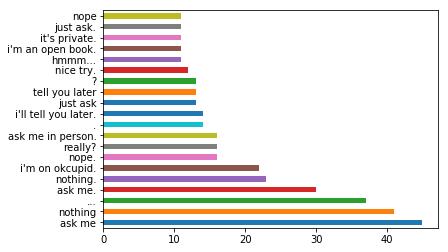


**************************************************

ESSAY9



! !  <br />\n   , , , , , , , , ,  ---if you can\nunderstand what that means.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1
! credit problems &amp;&amp; !children &amp;&amp; college degree\n&amp;&amp; (.this &gt; 72 inches)                                                                                           

None


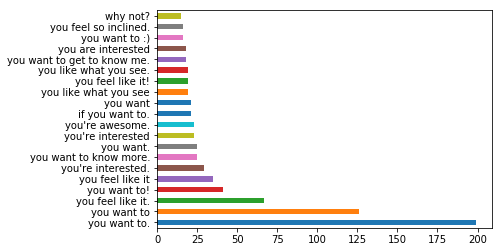


**************************************************

ETHNICITY



asian                                     6134
asian, black                                59
asian, black, hispanic / latin               2
asian, black, hispanic / latin, other        2
asian, black, hispanic / latin, white        2
                                         ...  
pacific islander, other                     14
pacific islander, white                    156
pacific islander, white, other              18
white                                    32831
white, other                               641
Name: ethnicity, Length: 217, dtype: int64

None


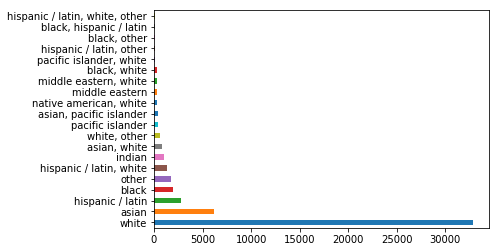


**************************************************

HEIGHT



1.0      1
3.0      1
4.0      1
6.0      1
8.0      1
        ..
91.0     3
92.0     1
93.0     1
94.0     3
95.0    20
Name: height, Length: 60, dtype: int64

None


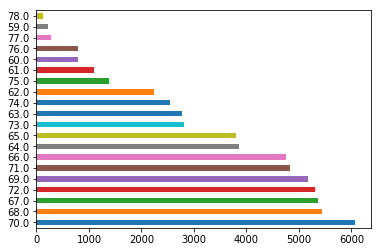


**************************************************

INCOME



-1          48442
 20000       2952
 30000       1048
 40000       1005
 50000        975
            ...  
 100000      1621
 150000       631
 250000       149
 500000        48
 1000000      521
Name: income, Length: 13, dtype: int64

None


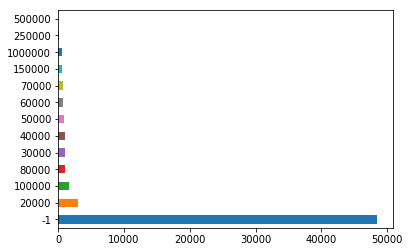


**************************************************

JOB



artistic / musical / writer          4439
banking / financial / real estate    2266
clerical / administrative             805
computer / hardware / software       4709
construction / craftsmanship         1021
                                     ... 
sales / marketing / biz dev          4391
science / tech / engineering         4848
student                              4882
transportation                        366
unemployed                            273
Name: job, Length: 21, dtype: int64

None


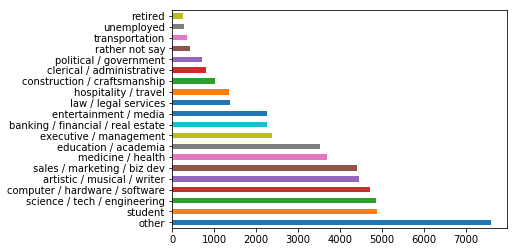


**************************************************

LAST_ONLINE



2011-06-27-01-52    1
2011-06-27-08-22    1
2011-06-27-08-25    1
2011-06-27-09-33    1
2011-06-27-09-34    1
                   ..
2012-07-01-08-52    4
2012-07-01-08-53    3
2012-07-01-08-54    1
2012-07-01-08-56    4
2012-07-01-08-57    1
Name: last_online, Length: 30123, dtype: int64

None


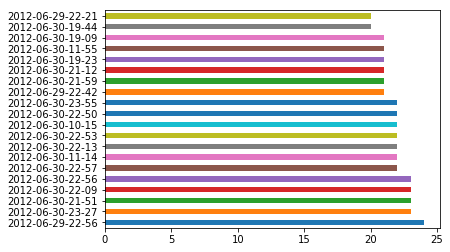


**************************************************

LOCATION



alameda, california          910
albany, california           233
amsterdam, netherlands         1
arcadia, california            1
asheville, north carolina      1
                            ... 
west oakland, california       7
westlake, california          11
woodacre, california          16
woodbridge, virginia           2
woodside, california          11
Name: location, Length: 199, dtype: int64

None


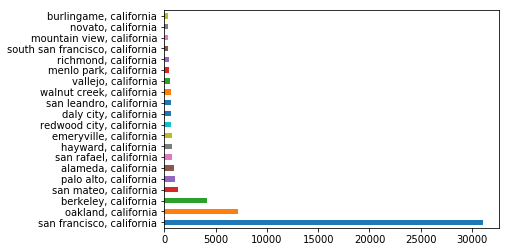


**************************************************

OFFSPRING



doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
                                                       ... 
has kids, and might want more                           115
has kids, and wants more                                 21
has kids, but doesn&rsquo;t want more                   442
might want kids                                         182
wants kids                                              225
Name: offspring, Length: 15, dtype: int64

None


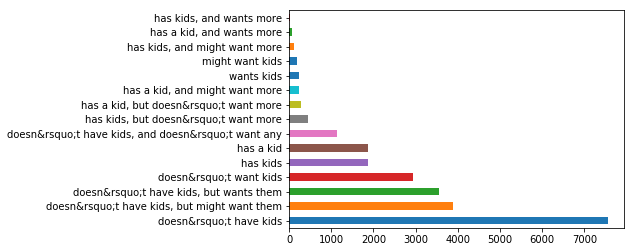


**************************************************

ORIENTATION



bisexual     2767
gay          5573
straight    51606
Name: orientation, dtype: int64

None


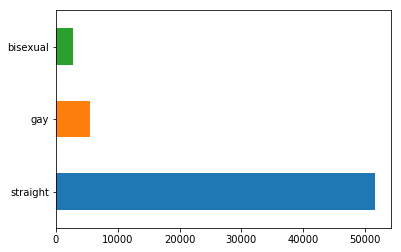


**************************************************

PETS



dislikes cats                        122
dislikes dogs                         44
dislikes dogs and dislikes cats      196
dislikes dogs and has cats            81
dislikes dogs and likes cats         240
                                   ...  
likes cats                          1063
likes dogs                          7224
likes dogs and dislikes cats        2029
likes dogs and has cats             4313
likes dogs and likes cats          14814
Name: pets, Length: 15, dtype: int64

None


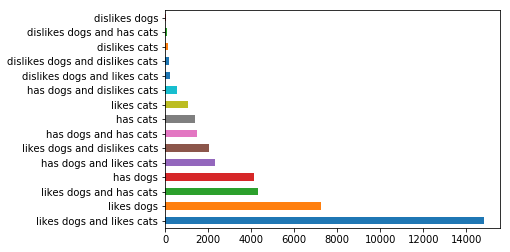


**************************************************

RELIGION



agnosticism                                  2724
agnosticism and laughing about it            2496
agnosticism and somewhat serious about it     642
agnosticism and very serious about it         314
agnosticism but not too serious about it     2636
                                             ... 
other                                        2691
other and laughing about it                  2119
other and somewhat serious about it           846
other and very serious about it               533
other but not too serious about it           1554
Name: religion, Length: 45, dtype: int64

None


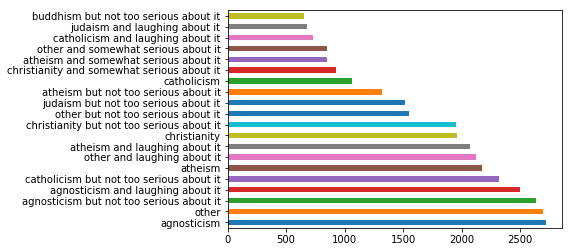


**************************************************

SEX



f    24117
m    35829
Name: sex, dtype: int64

None


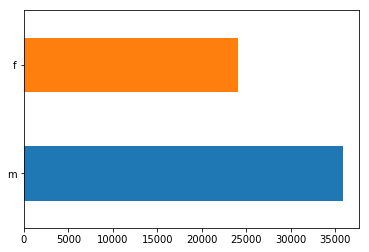


**************************************************

SIGN



aquarius                                       954
aquarius and it matters a lot                   63
aquarius and it&rsquo;s fun to think about    1503
aquarius but it doesn&rsquo;t matter          1408
aries                                          996
                                              ... 
taurus but it doesn&rsquo;t matter            1450
virgo                                         1029
virgo and it matters a lot                      41
virgo and it&rsquo;s fun to think about       1574
virgo but it doesn&rsquo;t matter             1497
Name: sign, Length: 48, dtype: int64

None


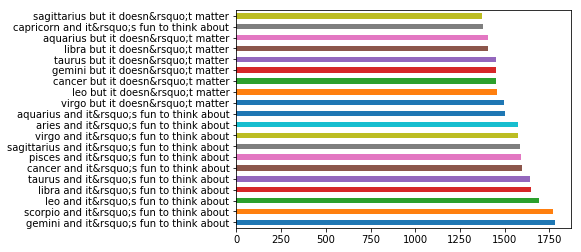


**************************************************

SMOKES



no                43896
sometimes          3787
trying to quit     1480
when drinking      3040
yes                2231
Name: smokes, dtype: int64

None


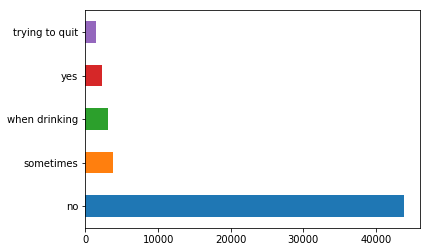


**************************************************

SPEAKS



afrikaans, english                                                                                      1
english                                                                                             21828
english (fluently)                                                                                   6628
english (fluently), afrikaans (fluently)                                                                3
english (fluently), afrikaans (fluently), albanian (fluently), arabic (fluently), c++ (fluently)        1
                                                                                                    ...  
english, yiddish (poorly), spanish (okay), latin (poorly)                                               1
english, yiddish (poorly), spanish (poorly)                                                             1
french (fluently), german (fluently), spanish (fluently), english                                       1
french (okay), english                        

None


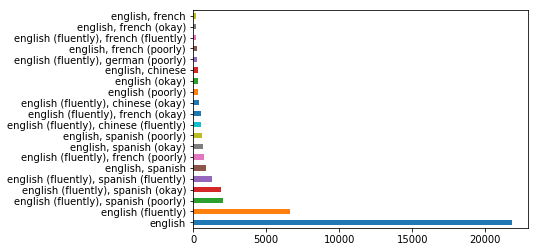


**************************************************

STATUS



available          1865
married             310
seeing someone     2064
single            55697
unknown              10
Name: status, dtype: int64

None


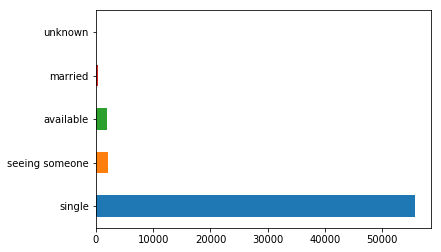


**************************************************



In [7]:
for i in df.columns:
    print(i.upper())
    print()
    print(view(df[i].value_counts().sort_index(),5))
    df[i].value_counts().head(20).plot(kind='barh')
    plt.show()
    print()
    print('*'*50)
    print()

## Cleaning

* check missing data and filler values
* drop unnecessary rows/columns
* fix data types
* set index
* preview heat map
* feature engineering

In [8]:
# Function for renaming values in a column

def rename(column, original, rename):
    df.loc[df[column].str.contains(original), column] = str(rename)
    return

In [9]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

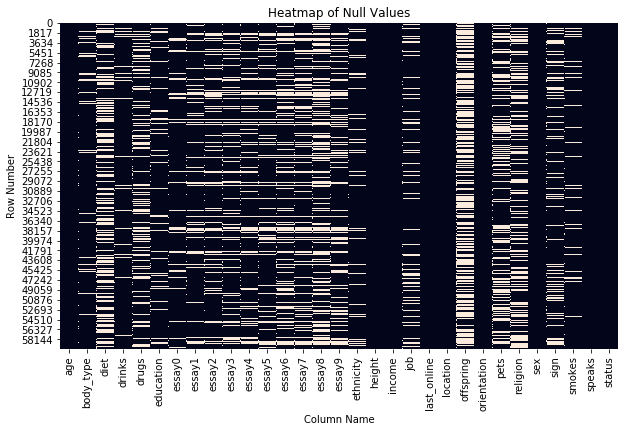

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Null Values')
plt.xlabel('Column Name')
plt.ylabel('Row Number')
plt.show()

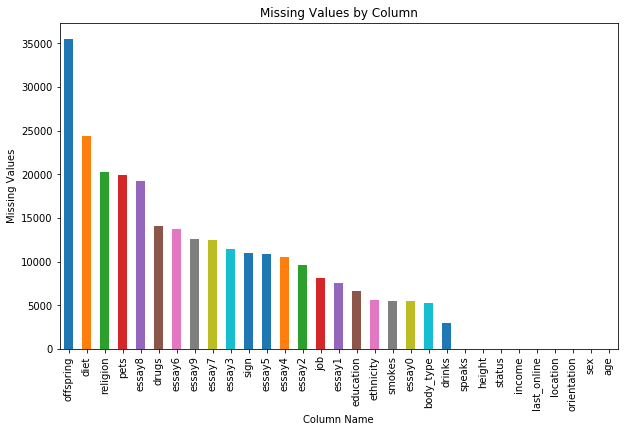

In [11]:
plt.figure(figsize=(10,6))
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column Name')
plt.ylabel('Missing Values')
plt.show()

#### Essay Questions
Drop, because they are messy and incomplete (cut off after a certain number of characters)

In [12]:
essay_cols = list(df.columns[df.columns.str.contains('essay')])

In [13]:
df = df.drop(columns=essay_cols)

#### Age

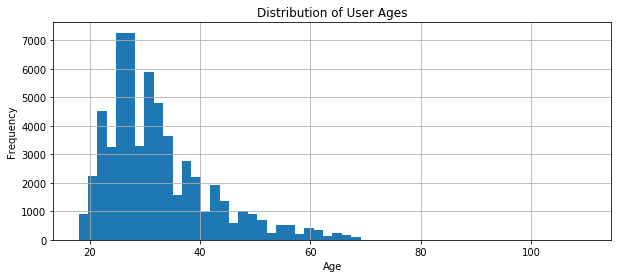

In [14]:
df.age.hist(bins=54, figsize=(10,4))
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

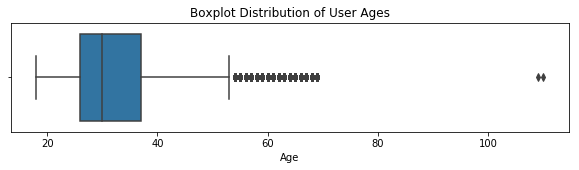

In [15]:
plt.figure(figsize=(10,2))
sns.boxplot(df.age, orient='h')
plt.title('Boxplot Distribution of User Ages')
plt.xlabel('Age')
plt.show()

In [16]:
df.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [17]:
view(df.age.value_counts().sort_index(),5)

18      309
19      611
20      953
21     1282
22     1934
       ... 
67       66
68       59
69       31
109       1
110       1
Name: age, Length: 54, dtype: int64

In [18]:
# df.age.quantile(.985)

In [19]:
df = df[df.age<=100]

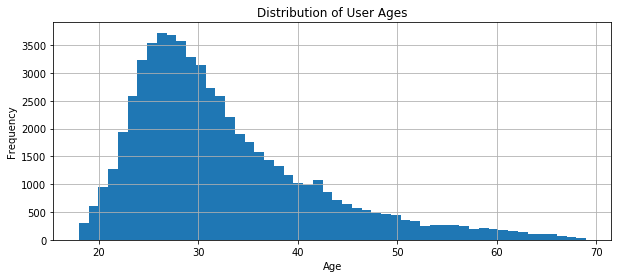

In [20]:
df.age.hist(bins=52, figsize=(10,4))
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
df.age.describe()

count    59944.000000
mean        32.337715
std          9.442423
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

#### Body Type

In [22]:
print('Percentage of each answer from the total entries:')
round(df.body_type.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


average           0.27
fit               0.23
athletic          0.22
thin              0.09
curvy             0.07
a little extra    0.05
skinny            0.03
full figured      0.02
overweight        0.01
jacked            0.01
used up           0.01
rather not say    0.00
Name: body_type, dtype: float64

In [23]:
print(f'Percentage of nulls from the total entries: {round(df.body_type.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 8.83


In [24]:
df.body_type.fillna("not_answered", inplace=True)

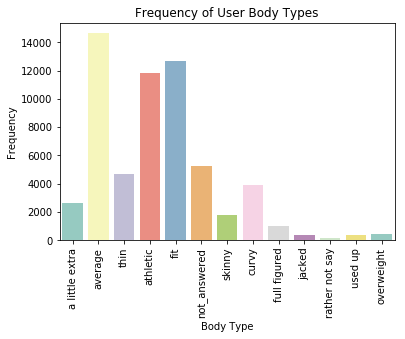

In [658]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='body_type', palette='Set3')
plt.title('Frequency of User Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

#### Diet

In [26]:
print('Percentage of each answer from the total entries:')
round(df.diet.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


mostly anything        0.47
anything               0.17
strictly anything      0.14
mostly vegetarian      0.10
mostly other           0.03
strictly vegetarian    0.02
vegetarian             0.02
strictly other         0.01
mostly vegan           0.01
other                  0.01
strictly vegan         0.01
vegan                  0.00
mostly kosher          0.00
mostly halal           0.00
strictly halal         0.00
strictly kosher        0.00
halal                  0.00
kosher                 0.00
Name: diet, dtype: float64

In [27]:
print(f'Percentage of nulls from the total entries: {round(df.diet.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 40.69


In [28]:
df.diet.fillna("anything", inplace=True)

In [29]:
rename('diet','anything','anything')
rename('diet','halal','halal')
rename('diet','kosher','kosher')
rename('diet','other','other')
rename('diet','vegan','vegan')
rename('diet','vegetarian','vegetarian')

In [30]:
print('Percentage of each answer from the total entries:')
round(df.diet.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


anything      0.87
vegetarian    0.08
other         0.03
vegan         0.01
kosher        0.00
halal         0.00
Name: diet, dtype: float64

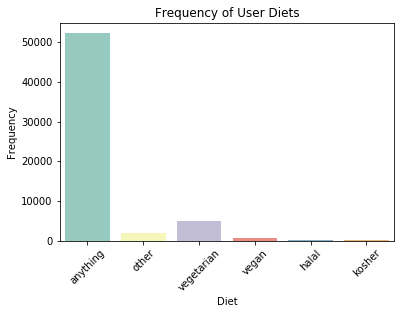

In [657]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diet', palette='Set3')
plt.title('Frequency of User Diets')
plt.xlabel('Diet')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Drinks

In [32]:
print('Frequency of each answer:')
df.drinks.value_counts()

Frequency of each answer:


socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [33]:
print('Percentage of each answer from the total entries:')
round(df.drinks.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


socially       0.73
rarely         0.10
often          0.09
not at all     0.06
very often     0.01
desperately    0.01
Name: drinks, dtype: float64

In [34]:
print(f'Percentage of nulls from the total entries: {round(df.drinks.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 4.98


In [35]:
df.drinks.fillna("not_answered", inplace=True)

In [36]:
rename('drinks','not at all','never')
rename('drinks','very often','very_often')

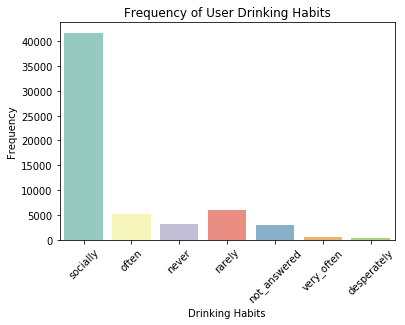

In [673]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='drinks', palette='Set3')
plt.title('Frequency of User Drinking Habits')
plt.xlabel('Drinking Habits')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Drugs

In [38]:
print('Percentage of each answer from the total entries:')
round(df.drugs.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


never        0.82
sometimes    0.17
often        0.01
Name: drugs, dtype: float64

In [39]:
print(f'Percentage of nulls from the total entries: {round(df.drugs.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 23.49


In [40]:
df.drugs.fillna("not_answered", inplace=True)

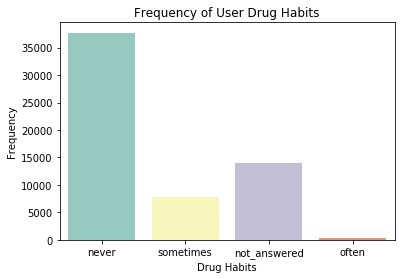

In [674]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='drugs', palette='Set3')
plt.title('Frequency of User Drug Habits')
plt.xlabel('Drug Habits')
plt.ylabel('Frequency')
plt.show()

#### Education

In [42]:
print('Frequency of each answer from the total entries:')
df.education.value_counts()

Frequency of each answer from the total entries:


graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1682
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [43]:
print(f'Percentage of nulls from the total entries: {round(df.education.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 11.06


In [44]:
view(df[df.education.isna()],3)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
10,35,average,anything,socially,not_answered,NaN,white,70.0,-1,NaN,2012-06-04-14-59,"san francisco, california",NaN,straight,NaN,NaN,m,taurus,yes,english,available
12,24,not_answered,anything,often,not_answered,NaN,white,72.0,-1,entertainment / media,2012-05-28-21-28,"san francisco, california",doesn&rsquo;t have kids,straight,NaN,other,m,taurus,NaN,english,single
27,22,average,anything,socially,never,NaN,asian,67.0,-1,other,2012-06-25-23-06,"oakland, california",NaN,straight,has dogs and dislikes cats,agnosticism and laughing about it,m,leo and it&rsquo;s fun to think about,no,"english (fluently), other (fluently), thai (po...",single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59933,30,not_answered,anything,socially,never,NaN,white,64.0,-1,NaN,2012-06-30-09-26,"san francisco, california",NaN,straight,NaN,christianity,f,NaN,NaN,english,single
59935,33,curvy,anything,socially,never,NaN,white,67.0,-1,NaN,2012-06-02-08-16,"san mateo, california",has kids,straight,NaN,NaN,f,virgo and it&rsquo;s fun to think about,when drinking,english (fluently),single
59938,48,average,anything,not_answered,not_answered,NaN,"native american, hispanic / latin",73.0,-1,NaN,2012-06-14-16-51,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,other,m,leo and it&rsquo;s fun to think about,NaN,english,single


In [45]:
df.education.fillna("not_answered", inplace=True)

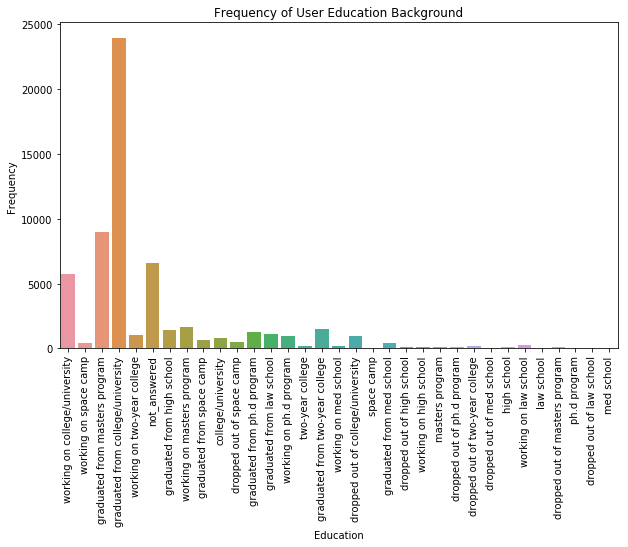

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education')
plt.title('Frequency of User Education Background')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [47]:
hs = ["graduated from high school", "graduated from space camp", "dropped out of space camp", "working on space camp", "high school", "space camp"]
college = ["graduated from college/university", "graduated from two-year college", "college/university", "two-year college"]
grad = ["graduated from masters program", "graduated from ph.d program", "graduated from law school", "graduated from med school", "masters program", "ph.d program", "law school", "med school"]
some_hs = ["dropped out of high school", "working on high school"]
some_college = ["working on college/university", "working on two-year college", "dropped out of college/university", "dropped out of two-year college"]
some_grad = ["working on masters program", "working on ph.d program", "working on law school", "working on med school", "dropped out of masters program", "dropped out of ph.d program", "dropped out of law school", "dropped out of med school"]

In [48]:
for e in hs:
    rename("education", e, "highschool")

for e in college:
    rename("education", e, "college")

for e in grad:
    rename("education", e, "grad")

for e in some_hs:
    rename("education", e, "some_highschool")

for e in some_college:
    rename("education", e, "some_college")

for e in some_grad:
    rename("education", e, "some_grad")

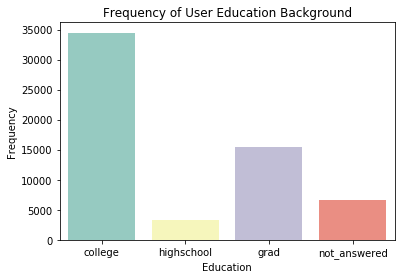

In [656]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='education', palette='Set3')
plt.title('Frequency of User Education Background')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

#### Ethnicity

In [50]:
print('Preview frequency of each answer:')
view(df.ethnicity.value_counts(),7)

Preview frequency of each answer:


white                                                                                        32831
asian                                                                                         6134
hispanic / latin                                                                              2823
black                                                                                         2008
other                                                                                         1706
hispanic / latin, white                                                                       1301
indian                                                                                        1077
                                                                                             ...  
asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin        1
asian, middle eastern, black, native american, hispanic / latin, white                           1
middle eas

In [51]:
print(f'Percentage of nulls from the total entries: {round(df.ethnicity.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 9.47


In [52]:
df.ethnicity.fillna("not_answered", inplace=True)

In [53]:
print(f"Number of users with ethnicity including White: {len(df[df.ethnicity.str.contains('white')])}")
print(f"Number of users with ethnicity including Asian: {len(df[df.ethnicity.str.contains('asian')])}")
print(f"Number of users with ethnicity including Hispanic/Latino: {len(df[df.ethnicity.str.contains('hispanic')])}")
print(f"Number of users with ethnicity including Black: {len(df[df.ethnicity.str.contains('black')])}")
print(f"Number of users with ethnicity including Indian: {len(df[df.ethnicity.str.contains('indian')])}")
print(f"Number of users with ethnicity including Pacific Islander: {len(df[df.ethnicity.str.contains('pacific')])}")
print(f"Number of users with ethnicity including Middle Eastern: {len(df[df.ethnicity.str.contains('middle')])}")
print(f"Number of users with ethnicity including Other: {len(df[df.ethnicity.str.contains('other')])}")

Number of users with ethnicity including White: 37882
Number of users with ethnicity including Asian: 8205
Number of users with ethnicity including Hispanic/Latino: 5357
Number of users with ethnicity including Black: 3328
Number of users with ethnicity including Indian: 1449
Number of users with ethnicity including Pacific Islander: 1473
Number of users with ethnicity including Middle Eastern: 950
Number of users with ethnicity including Other: 3567


In [54]:
df["ethnicity_asian"] = df.ethnicity.where(df.ethnicity.str.contains('asian'), False)
df["ethnicity_asian"] = df.ethnicity_asian.where(df.ethnicity_asian == False, True)

In [55]:
df["ethnicity_black"] = df.ethnicity.where(df.ethnicity.str.contains('black'), False)
df["ethnicity_black"] = df.ethnicity_black.where(df.ethnicity_black == False, True)

In [56]:
df["ethnicity_hispanic"] = df.ethnicity.where(df.ethnicity.str.contains('hispanic / latin'), False)
df["ethnicity_hispanic"] = df.ethnicity_hispanic.where(df.ethnicity_hispanic == False, True)

In [57]:
df["ethnicity_indian"] = df.ethnicity.where(df.ethnicity.str.contains('indian'), False)
df["ethnicity_indian"] = df.ethnicity_indian.where(df.ethnicity_indian == False, True)

In [58]:
df["ethnicity_middle_eastern"] = df.ethnicity.where(df.ethnicity.str.contains('middle eastern'), False)
df["ethnicity_middle_eastern"] = df.ethnicity_middle_eastern.where(df.ethnicity_middle_eastern == False, True)

In [59]:
df["ethnicity_native_american"] = df.ethnicity.where(df.ethnicity.str.contains('native american'), False)
df["ethnicity_native_american"] = df.ethnicity_native_american.where(df.ethnicity_native_american == False, True)

In [60]:
df["ethnicity_white"] = df.ethnicity.where(df.ethnicity.str.contains('white'), False)
df["ethnicity_white"] = df.ethnicity_white.where(df.ethnicity_white == False, True)

In [61]:
df["ethnicity_other"] = df.ethnicity.where(df.ethnicity.str.contains('other'), False)
df["ethnicity_other"] = df.ethnicity_other.where(df.ethnicity_other == False, True)

In [62]:
df["ethnicity_not_answered"] = df.ethnicity.where(df.ethnicity.str.contains('not_answered'), False)
df["ethnicity_not_answered"] = df.ethnicity_not_answered.where(df.ethnicity_not_answered == False, True)

In [63]:
df = df.drop(columns='ethnicity')

#### Height

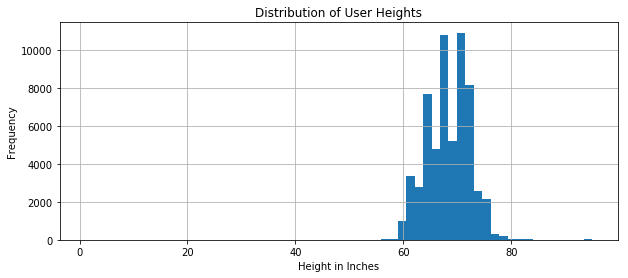

In [64]:
df.height.hist(bins=60, figsize=(10,4))
plt.title('Distribution of User Heights')
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

In [65]:
df[df.height.isna()]

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_indian,ethnicity_middle_eastern,ethnicity_native_american,ethnicity_white,ethnicity_other,ethnicity_not_answered
36428,32,not_answered,anything,not_answered,not_answered,not_answered,NaN,-1,artistic / musical / writer,2012-06-30-20-41,"berkeley, california",NaN,straight,NaN,NaN,f,NaN,NaN,"english (fluently), german (fluently)",single,False,False,False,False,False,False,False,True,False
54002,25,not_answered,anything,not_answered,never,not_answered,NaN,-1,NaN,2012-06-30-18-41,"guadalajara, mexico",NaN,straight,NaN,NaN,m,aries,NaN,english,single,False,False,True,False,False,False,False,False,False
58983,49,not_answered,anything,not_answered,not_answered,not_answered,NaN,-1,NaN,2012-07-01-08-35,"berkeley, california",doesn&rsquo;t have kids,straight,likes cats,NaN,m,NaN,no,english (fluently),single,False,False,False,False,False,False,False,False,True


In [66]:
df = df[~df.height.isna()]

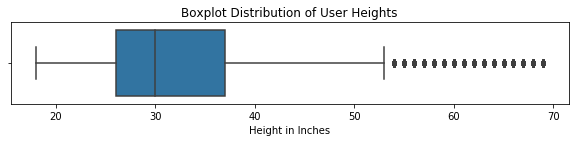

In [67]:
plt.figure(figsize=(10,1.5))
sns.boxplot(df.age, orient='h')
plt.title('Boxplot Distribution of User Heights')
plt.xlabel('Height in Inches')
plt.show()

In [68]:
df = df[(df.height>=56) & (df.height<=84)]

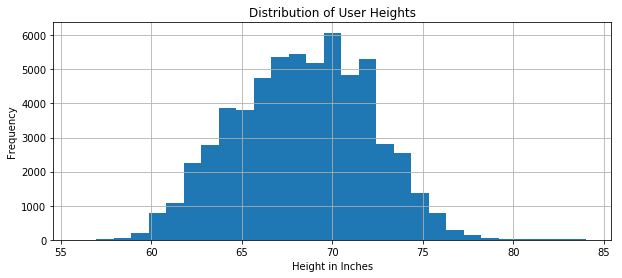

In [69]:
df.height.hist(bins=29, figsize=(10,4))
plt.title('Distribution of User Heights')
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

#### Income

In [70]:
print('Percentage of each answer from the total entries:')
round(df.income.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


-1          0.81
 20000      0.05
 100000     0.03
 80000      0.02
 30000      0.02
 40000      0.02
 50000      0.02
 60000      0.01
 70000      0.01
 150000     0.01
 1000000    0.01
 250000     0.00
 500000     0.00
Name: income, dtype: float64

In [71]:
df = df.drop(columns='income')

#### Job

In [72]:
print('Percentage of each answer from the total entries:')
round(df.job.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


other                                0.15
student                              0.09
science / tech / engineering         0.09
computer / hardware / software       0.09
artistic / musical / writer          0.09
sales / marketing / biz dev          0.08
medicine / health                    0.07
education / academia                 0.07
executive / management               0.05
banking / financial / real estate    0.04
entertainment / media                0.04
law / legal services                 0.03
hospitality / travel                 0.03
construction / craftsmanship         0.02
clerical / administrative            0.02
political / government               0.01
rather not say                       0.01
transportation                       0.01
unemployed                           0.01
retired                              0.00
military                             0.00
Name: job, dtype: float64

In [73]:
print(f'Percentage of nulls from the total entries: {round(df.job.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 13.66


In [74]:
df.job.fillna("not_answered", inplace=True)

In [75]:
rename('job','other', 'other')
rename('job','student', 'student')
rename('job','science / tech / engineering', 'science_tech_engineering')
rename('job','computer / hardware / software', 'computer_hardware_software')
rename('job','artistic / musical / writer', 'art_music_writing')
rename('job','sales / marketing / biz dev', 'sales_marketing_business')
rename('job','medicine / health', 'medicine_health')
rename('job','education / academia', 'education_academia')
rename('job','executive / management', 'executive_management')
rename('job','banking / financial / real estate', 'banking_financial_realestate')
rename('job','entertainment / media', 'entertainment_media')
rename('job','law / legal services', 'law_legal')
rename('job','hospitality / travel', 'hospitality_travel')
rename('job','construction / craftsmanship', 'construction_craftmanship')
rename('job','clerical / administrative', 'clerical_administrative')
rename('job','political / government', 'politician_government')
rename('job','rather not say', 'not_answered')
rename('job','transportation', 'transportation')
rename('job','unemployed', 'unemployed')
rename('job','retired', 'retired')
rename('job','military', 'military')

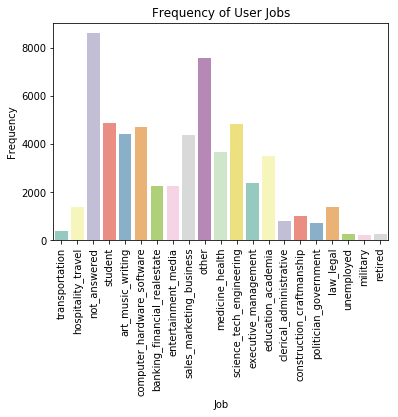

In [655]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='job', palette='Set3')
plt.title('Frequency of User Jobs')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

#### Last Online

In [77]:
print(f'Percentage of nulls from the total entries: {round(df.last_online.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 0.0


In [78]:
view(df.last_online,5)

0        2012-06-28-20-30
1        2012-06-29-21-41
2        2012-06-27-09-10
3        2012-06-28-14-22
4        2012-06-27-21-26
               ...       
59941    2012-06-12-21-47
59942    2012-06-29-11-01
59943    2012-06-27-23-37
59944    2012-06-23-13-01
59945    2012-06-29-00-42
Name: last_online, Length: 59862, dtype: object

In [79]:
df.last_online = pd.to_datetime(df.last_online, format='%Y-%m-%d-%H-%M').dt.date

In [80]:
view(df.last_online.value_counts().sort_index(),5)

2011-06-27       24
2011-06-28       16
2011-06-29       21
2011-06-30       23
2011-07-01       27
              ...  
2012-06-27     2741
2012-06-28     3979
2012-06-29     8432
2012-06-30    13733
2012-07-01     2089
Name: last_online, Length: 371, dtype: int64

In [81]:
# Saving in case I want to explore separately

last_online = df.last_online

In [82]:
df = df.drop(columns='last_online')

#### Location

In [83]:
print('Frequency of each answer from the total entries:')
view(df.location.value_counts(),7)

Frequency of each answer from the total entries:


san francisco, california     31023
oakland, california            7207
berkeley, california           4204
san mateo, california          1327
palo alto, california          1063
alameda, california             910
san rafael, california          754
                              ...  
seaside, california               1
canyon country, california        1
granite bay, california           1
taunton, massachusetts            1
cork, ireland                     1
jackson, mississippi              1
milwaukee, wisconsin              1
Name: location, Length: 198, dtype: int64

In [84]:
print(f'Percentage of nulls from the total entries: {round(df.location.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 0.0


In [86]:
# Saving in case I want to explore separately

location = df.location

In [87]:
df = df.drop(columns='location')

#### Offspring

In [88]:
print('Percentage of each answer from the total entries:')
round(df.offspring.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


doesn&rsquo;t have kids                                0.31
doesn&rsquo;t have kids, but might want them           0.16
doesn&rsquo;t have kids, but wants them                0.15
doesn&rsquo;t want kids                                0.12
has kids                                               0.08
has a kid                                              0.08
doesn&rsquo;t have kids, and doesn&rsquo;t want any    0.05
has kids, but doesn&rsquo;t want more                  0.02
has a kid, but doesn&rsquo;t want more                 0.01
has a kid, and might want more                         0.01
wants kids                                             0.01
might want kids                                        0.01
has kids, and might want more                          0.00
has a kid, and wants more                              0.00
has kids, and wants more                               0.00
Name: offspring, dtype: float64

In [89]:
print(f'Percentage of nulls from the total entries: {round(df.offspring.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 59.31


In [90]:
df = df.drop(columns='offspring')

#### Orientation

In [91]:
print('Percentage of each answer from the total entries:')
round(df.orientation.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


straight    0.86
gay         0.09
bisexual    0.05
Name: orientation, dtype: float64

In [92]:
print(f'Percentage of nulls from the total entries: {round(df.orientation.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 0.0


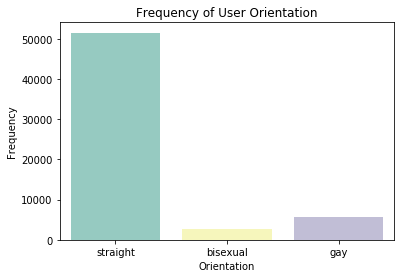

In [649]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='orientation', palette='Set3')
plt.title('Frequency of User Orientation')
plt.xlabel('Orientation')
plt.ylabel('Frequency')
plt.show()

#### Pets

In [94]:
print('Percentage of each answer from the total entries:')
round(df.pets.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


likes dogs and likes cats          0.37
likes dogs                         0.18
likes dogs and has cats            0.11
has dogs                           0.10
has dogs and likes cats            0.06
likes dogs and dislikes cats       0.05
has dogs and has cats              0.04
has cats                           0.04
likes cats                         0.03
has dogs and dislikes cats         0.01
dislikes dogs and likes cats       0.01
dislikes dogs and dislikes cats    0.00
dislikes cats                      0.00
dislikes dogs and has cats         0.00
dislikes dogs                      0.00
Name: pets, dtype: float64

In [95]:
print(f'Number of nulls from the total entries: {round(df.pets.isna().sum()/len(df)*100,2)}')

Number of nulls from the total entries: 33.24


In [96]:
df["cat_person"] = df.pets.where(df.pets.str.contains('likes cats|has cats'), False)
df["cat_person"] = df.cat_person.where(df.cat_person == False, True)

In [97]:
df["dog_person"] = df.pets.where(df.pets.str.contains('likes dogs|has dogs'), False)
df["dog_person"] = df.dog_person.where(df.dog_person == False, True)

In [98]:
df = df.drop(columns='pets')

#### Religion

In [99]:
print('Frequency of each answer from the total entries:')
df.religion.value_counts()

Frequency of each answer from the total entries:


agnosticism                                   2721
other                                         2688
agnosticism but not too serious about it      2634
agnosticism and laughing about it             2493
catholicism but not too serious about it      2317
atheism                                       2173
other and laughing about it                   2112
atheism and laughing about it                 2070
christianity                                  1954
christianity but not too serious about it     1948
other but not too serious about it            1551
judaism but not too serious about it          1515
atheism but not too serious about it          1318
catholicism                                   1063
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            845
catholicism and laughing about it              726
judaism and laughing about it                  679
buddhism but not too serious ab

In [100]:
print(f'Percentage of nulls from the total entries: {round(df.religion.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 33.75


In [101]:
df.religion.fillna("not_answered", inplace=True)

In [102]:
rename('religion','laughing|but','nonreligious')

In [103]:
rename('religion', 'agnosticism', 'agnosticism')
rename('religion', 'atheism', 'atheism')
rename('religion', 'christianity', 'christianity')
rename('religion', 'judaism', 'judaism')
rename('religion', 'catholicism', 'catholicism')
rename('religion', 'islam', 'islam')
rename('religion', 'hinduism', 'hinduism')
rename('religion', 'buddhism', 'buddhism')
rename('religion', 'other', 'other')

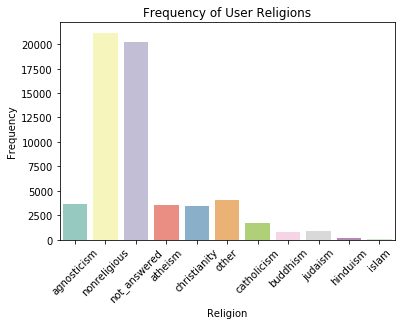

In [648]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='religion', palette='Set3')
plt.title('Frequency of User Religions')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Sex

In [105]:
print('Percentage of each answer from the total entries:')
round(df.sex.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


m    0.6
f    0.4
Name: sex, dtype: float64

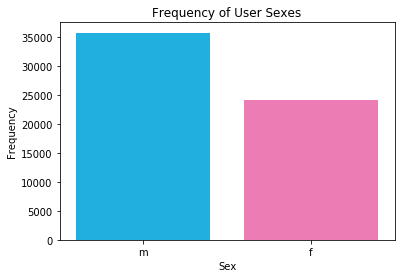

In [647]:
colors=['deepskyblue','hotpink']

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette=colors)
plt.title('Frequency of User Sexes')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

#### Sign

In [107]:
print('Frequency of each answer from the total entries:')
df.sign.value_counts()

Frequency of each answer from the total entries:


gemini and it&rsquo;s fun to think about         1780
scorpio and it&rsquo;s fun to think about        1771
leo and it&rsquo;s fun to think about            1687
libra and it&rsquo;s fun to think about          1645
taurus and it&rsquo;s fun to think about         1639
cancer and it&rsquo;s fun to think about         1593
pisces and it&rsquo;s fun to think about         1589
sagittarius and it&rsquo;s fun to think about    1582
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1496
leo but it doesn&rsquo;t matter                  1455
cancer but it doesn&rsquo;t matter               1453
gemini but it doesn&rsquo;t matter               1451
taurus but it doesn&rsquo;t matter               1445
libra but it doesn&rsquo;t matter                1406
aquarius but it doesn&rsquo;t matter             1406
capricorn and it&rsquo;s fun

In [108]:
print(f'Percentage of nulls from the total entries: {round(df.sign.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 18.43


In [109]:
df = df.drop(columns='sign')

#### Smokes

In [110]:
print('Percentage of each answer from the total entries:')
round(df.smokes.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


no                0.81
sometimes         0.07
when drinking     0.06
yes               0.04
trying to quit    0.03
Name: smokes, dtype: float64

In [111]:
print(f'Percentage of nulls from the total entries: {round(df.smokes.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 9.18


In [112]:
df.smokes.fillna("not_answered", inplace=True)

In [113]:
rename('smokes','when drinking','when_drinking')
rename('smokes','trying to quit','trying_to_quit')

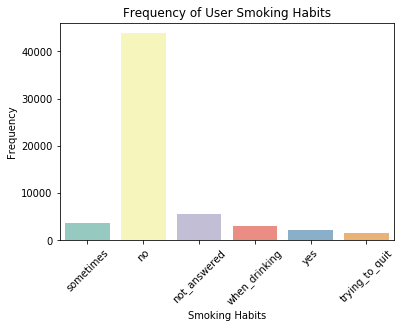

In [645]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='smokes', palette='Set3')
plt.title('Frequency of User Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Speaks

In [115]:
print('Frequency of each answer from the total entries:')
view(df.speaks.value_counts(),5)

Frequency of each answer from the total entries:


english                                                                                        21801
english (fluently)                                                                              6619
english (fluently), spanish (poorly)                                                            2056
english (fluently), spanish (okay)                                                              1915
english (fluently), spanish (fluently)                                                          1288
                                                                                               ...  
english (fluently), c++ (poorly), lisp (okay), french (poorly)                                     1
english (fluently), bulgarian (fluently), russian (okay), spanish (poorly), german (poorly)        1
english, urdu, hindi, japanese (poorly)                                                            1
english, swedish, danish                                                                   

In [116]:
print(f'Percentage of nulls from the total entries: {round(df.speaks.isna().sum()/len(df)*100,2)}')

Percentage of nulls from the total entries: 0.08


In [117]:
view(df[df.speaks.isna()],3)

,age,body_type,diet,drinks,drugs,education,height,job,orientation,religion,sex,smokes,speaks,status,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_indian,ethnicity_middle_eastern,ethnicity_native_american,ethnicity_white,ethnicity_other,ethnicity_not_answered,cat_person,dog_person
1664,32,thin,anything,very_often,never,grad,65.0,executive_management,straight,catholicism,m,no,NaN,single,True,False,True,False,False,False,True,False,False,False,True
1755,45,athletic,anything,socially,never,college,72.0,medicine_health,straight,agnosticism,m,no,NaN,single,False,False,False,False,False,False,True,False,False,True,True
2217,31,thin,anything,not_answered,never,college,72.0,science_tech_engineering,straight,other,m,no,NaN,single,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54647,30,skinny,anything,socially,sometimes,college,70.0,student,straight,other,m,trying_to_quit,NaN,single,False,False,False,False,False,False,True,False,False,True,True
57134,27,fit,anything,socially,not_answered,college,74.0,art_music_writing,straight,other,m,yes,NaN,single,False,False,False,False,True,False,True,False,False,False,False
57536,59,not_answered,anything,not_answered,not_answered,not_answered,67.0,not_answered,straight,christianity,f,no,NaN,single,False,False,False,False,False,False,True,False,False,False,False


In [118]:
df.speaks.fillna("english", inplace=True)

In [119]:
print(f'Number of users who speak English: {len(df[df.speaks.str.contains("English", case=False)])}')

Number of users who speak English: 59862


In [120]:
print(f'Number of users who are speak more than one language: {len(df[df.speaks.str.contains(",")])}')

Number of users who are speak more than one language: 30780


In [121]:
rename('speaks',',','multilingual')

In [122]:
df.speaks = df.speaks.where(df.speaks.str.contains('multi'), "english_only")

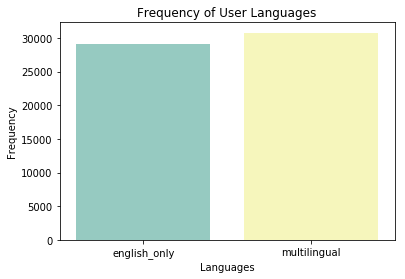

In [644]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='speaks', palette='Set3')
plt.title('Frequency of User Languages')
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.show()

#### Status

In [124]:
print('Percentage of each answer from the total entries:')
round(df.status.value_counts(normalize=True),2)

Percentage of each answer from the total entries:


single            0.93
seeing someone    0.03
available         0.03
married           0.01
unknown           0.00
Name: status, dtype: float64

In [125]:
print('Frequency of each answer from the total entries:')
df.status.value_counts()

Frequency of each answer from the total entries:


single            55620
seeing someone     2061
available          1862
married             309
unknown              10
Name: status, dtype: int64

In [126]:
print(f'Number of nulls from the total entries: {df.status.isna().sum()}')

Number of nulls from the total entries: 0


In [127]:
view(df[df.status=='married'],3)

,age,body_type,diet,drinks,drugs,education,height,job,orientation,religion,sex,smokes,speaks,status,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_indian,ethnicity_middle_eastern,ethnicity_native_american,ethnicity_white,ethnicity_other,ethnicity_not_answered,cat_person,dog_person
606,58,thin,anything,socially,never,college,72.0,not_answered,straight,not_answered,m,no,english_only,married,False,False,False,False,False,False,True,False,False,False,True
699,43,full figured,anything,socially,sometimes,college,64.0,art_music_writing,straight,nonreligious,f,no,english_only,married,False,False,False,False,False,False,True,False,False,True,True
943,38,not_answered,anything,socially,sometimes,college,67.0,science_tech_engineering,bisexual,atheism,f,sometimes,multilingual,married,False,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59330,49,not_answered,anything,never,never,college,73.0,entertainment_media,bisexual,nonreligious,m,no,english_only,married,False,False,False,False,False,False,True,False,False,True,True
59616,34,not_answered,anything,socially,never,grad,61.0,other,straight,nonreligious,f,no,multilingual,married,False,False,True,False,False,False,False,False,False,True,True
59816,30,thin,anything,rarely,never,college,65.0,hospitality_travel,straight,not_answered,f,no,multilingual,married,False,True,False,False,False,False,False,True,False,True,True


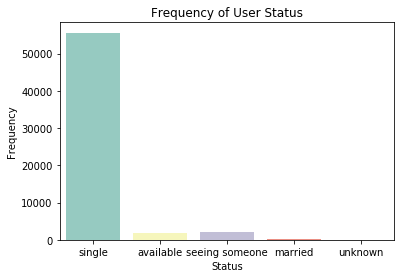

In [643]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='status', palette='Set3')
plt.title('Frequency of User Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

## Exploring

### Overview of Features

In [129]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'job', 'orientation', 'religion', 'sex', 'smokes', 'speaks', 'status',
       'ethnicity_asian', 'ethnicity_black', 'ethnicity_hispanic',
       'ethnicity_indian', 'ethnicity_middle_eastern',
       'ethnicity_native_american', 'ethnicity_white', 'ethnicity_other',
       'ethnicity_not_answered', 'cat_person', 'dog_person'],
      dtype='object')

In [130]:
for feature in df.columns:
    uniq = np.unique(df[feature])
    print('{} - {} distinct values: {}'.format(feature.upper(),len(uniq),uniq))

AGE - 52 distinct values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69]
BODY_TYPE - 13 distinct values: ['a little extra' 'athletic' 'average' 'curvy' 'fit' 'full figured'
 'jacked' 'not_answered' 'overweight' 'rather not say' 'skinny' 'thin'
 'used up']
DIET - 6 distinct values: ['anything' 'halal' 'kosher' 'other' 'vegan' 'vegetarian']
DRINKS - 7 distinct values: ['desperately' 'never' 'not_answered' 'often' 'rarely' 'socially'
 'very_often']
DRUGS - 4 distinct values: ['never' 'not_answered' 'often' 'sometimes']
EDUCATION - 4 distinct values: ['college' 'grad' 'highschool' 'not_answered']
HEIGHT - 29 distinct values: [56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84.]
JOB - 21 distinct values: ['art_music_writing' 'banking_financial_realestate'
 'clerical_administrative' 'computer_hardware_software'
 'con

In [131]:
view(df,5)

,age,body_type,diet,drinks,drugs,education,height,job,orientation,religion,sex,smokes,speaks,status,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_indian,ethnicity_middle_eastern,ethnicity_native_american,ethnicity_white,ethnicity_other,ethnicity_not_answered,cat_person,dog_person
0,22,a little extra,anything,socially,never,college,75.0,transportation,straight,agnosticism,m,sometimes,english_only,single,True,False,False,False,False,False,True,False,False,True,True
1,35,average,other,often,sometimes,highschool,70.0,hospitality_travel,straight,nonreligious,m,no,multilingual,single,False,False,False,False,False,False,True,False,False,True,True
2,38,thin,anything,socially,not_answered,grad,68.0,not_answered,straight,not_answered,m,no,multilingual,available,False,False,False,False,False,False,False,False,True,True,False
3,23,thin,vegetarian,socially,not_answered,college,71.0,student,straight,not_answered,m,no,multilingual,single,False,False,False,False,False,False,True,False,False,True,False
4,29,athletic,anything,socially,never,college,66.0,art_music_writing,straight,not_answered,m,no,english_only,single,True,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,not_answered,anything,socially,never,college,62.0,sales_marketing_business,straight,nonreligious,f,no,english_only,single,False,False,False,False,False,False,False,False,True,False,True
59942,24,fit,anything,often,sometimes,college,72.0,entertainment_media,straight,agnosticism,m,no,english_only,single,False,False,False,False,False,False,True,True,False,True,True
59943,42,average,anything,never,never,grad,71.0,construction_craftmanship,straight,nonreligious,m,no,english_only,single,True,False,False,False,False,False,False,False,False,False,False
59944,27,athletic,anything,socially,often,college,73.0,medicine_health,straight,nonreligious,m,trying_to_quit,multilingual,single,True,True,False,False,False,False,False,False,False,True,True


### The Most Common Answers for Males and Females

In [524]:
# Making a new dataframe to display the most common answers for male and female users

avg_user = pd.DataFrame(columns=['Feature','Modal Male','Modal Female'])
avg_user['Feature'] = df.columns[df.columns!='sex']
avg_user.set_index('Feature', inplace=True)

In [527]:
# Filling the dataframe with the most common answers

for i in df.columns[df.columns!='sex']:
    if df[df.sex=='m'][i].value_counts().idxmax() == 'not_answered':
        avg_user.loc[i]['Modal Male'] = df[df.sex=='m'][i].value_counts().index[1]
        
    elif df[df.sex=='m'][i].value_counts().idxmax() != 'not_answered':
        avg_user.loc[i]['Modal Male'] = df[df.sex=='m'][i].value_counts().idxmax()
        
    if df[df.sex=='f'][i].value_counts().idxmax() == 'not_answered':
        avg_user.loc[i]['Modal Female'] = df[df.sex=='f'][i].value_counts().index[1]
        
    elif df[df.sex=='f'][i].value_counts().idxmax() != 'not_answered':
        avg_user.loc[i]['Modal Female'] = df[df.sex=='f'][i].value_counts().idxmax()

In [528]:
# Job was the only column that had 'not_answered' and 'other' as the most common values for females
# so I will replace it with the third most common value

avg_user.loc['job']['Modal Female'] = df[df.sex=='f']['job'].value_counts().index[2]

In [529]:
avg_user

,Modal Male,Modal Female
Feature,,
age,26,25
body_type,athletic,average
diet,anything,anything
drinks,socially,socially
drugs,never,never
education,college,college
height,70,64
job,computer_hardware_software,medicine_health
orientation,straight,straight


### Male vs. Females

In [137]:
males = df[df.sex == 'm']
females = df[df.sex == 'f']

In [138]:
males.describe().T

,count,mean,std,min,25%,50%,75%,max
age,35778.0,32.018140,9.022807,18.0,26.0,30.0,36.0,69.0
height,35778.0,70.449746,2.873234,56.0,68.0,70.0,72.0,84.0


In [139]:
females.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24084.0,32.818386,10.014899,18.0,26.0,30.0,37.0,69.0
height,24084.0,65.111526,2.753341,56.0,63.0,65.0,67.0,84.0


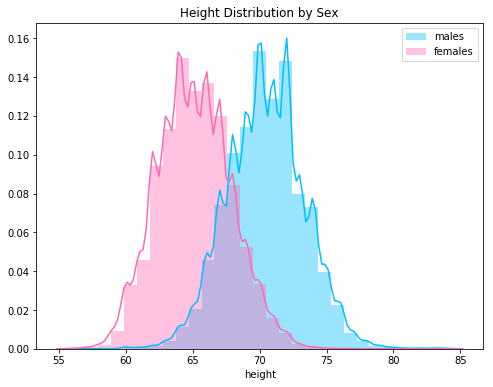

In [140]:
plt.figure(figsize=(8,6))
sns.distplot(males.height, label='males', color='deepskyblue', bins=29)
sns.distplot(females.height, label='females', color='hotpink', bins=29)
plt.title('Height Distribution by Sex')
plt.legend()
plt.show()

In [141]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(males.height, females.height)
print(f"The p-value is: {float(pval)}")

The p-value is: 0.0


A two-sample t-test indicates that there is a significant difference between the average height of male and female users.

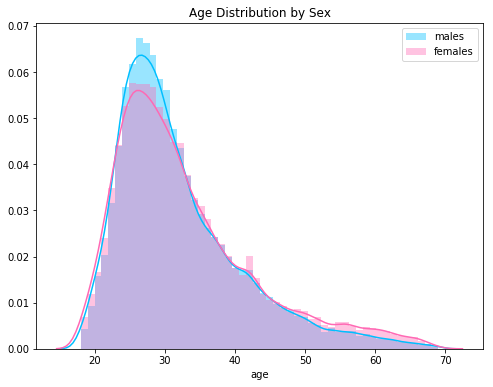

In [142]:
plt.figure(figsize=(8,6))
sns.distplot(males.age, label='males', color='deepskyblue', bins=52)
sns.distplot(females.age, label='females', color='hotpink', bins=52)
plt.title('Age Distribution by Sex')
plt.legend()
plt.show()

In [143]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(males.age, females.age)
print(f"The p-value is: {float(pval)}")

The p-value is: 2.6407082581881607e-24


### Age and Height

In [132]:
# Stats

df.describe()

,age,height
count,59862.000000,59862.000000
mean,32.340099,68.302045
std,9.442578,3.851796
min,18.000000,56.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,69.000000,84.000000


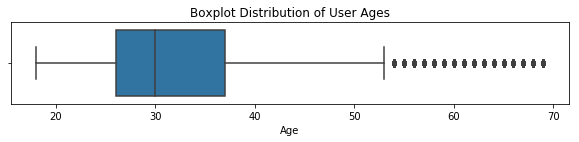

In [133]:
plt.figure(figsize=(10,1.5))
sns.boxplot(df.age, orient='h')
plt.title('Boxplot Distribution of User Ages')
plt.xlabel('Age')
plt.show()

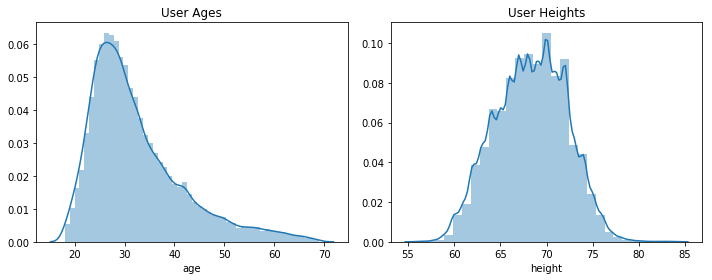

In [134]:
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
plt.title('User Ages')
sns.distplot(df.age, bins=52)

ax2 = plt.subplot(122)
sns.distplot(df.height, bins=29)
plt.title('User Heights')

plt.tight_layout()
plt.show()

In [135]:
numeric_cols = df.describe().columns

In [136]:
# View skew and kurtosis

for each in list(numeric_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df[each]),3))+' and the kurtosis is '+str(round(kurtosis(df[each]),3)))

For age the skew is 1.253 and the kurtosis is 1.445
For height the skew is -0.047 and the kurtosis is -0.432


### Orientation

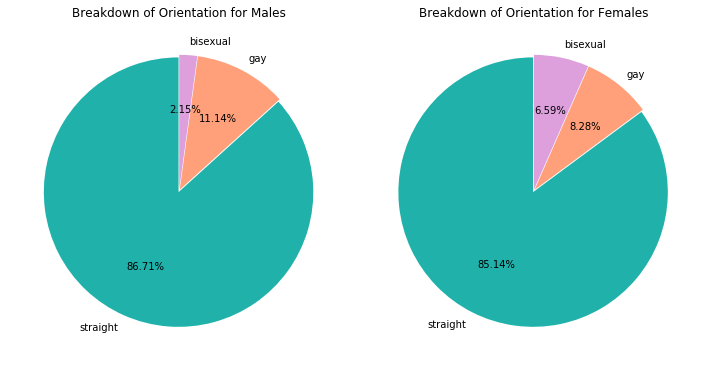

In [145]:
plt.figure(figsize=(10,6))

ax1 = plt.subplot(121)
plt.pie(males.orientation.value_counts(), labels=['straight','gay','bisexual'], colors=['lightseagreen','lightsalmon','plum'], explode=(0.01,0.01, 0.01), startangle=90, autopct='%1.2f%%')
plt.title('Breakdown of Orientation for Males')

ax1 = plt.subplot(122)
plt.pie(females.orientation.value_counts(), labels=['straight','gay','bisexual'], colors=['lightseagreen','lightsalmon','plum'], explode=(0.01,0.01, 0.01), startangle=90, autopct='%1.2f%%')
plt.title('Breakdown of Orientation for Females')

plt.tight_layout()
plt.show()

In [558]:
lgbt_males = df[(df.sex=='m') & (df.orientation!='straight')].orientation.value_counts().sum()
lgbt_females = df[(df.sex=='f') & (df.orientation != 'straight')].orientation.value_counts().sum()

print(f"Number of men who are open to dating males: {lgbt_males}")
      
print(f"Number of women who are open to dating females: {lgbt_females}")


Number of men who are open to dating males: 4754
Number of women who are open to dating females: 3579


In [560]:
interest_males = df[(df.sex=='m') & (df.orientation!='straight')].orientation.value_counts().sum() \
      + df[(df.sex=='f') & (df.orientation=='straight')].orientation.value_counts().sum()
interest_females = df[(df.sex=='f') & (df.orientation!='straight')].orientation.value_counts().sum() \
      + df[(df.sex=='m') & (df.orientation=='straight')].orientation.value_counts().sum()

print(f"Number of men who fall in gender of interest amongst users: {interest_males}")
      
print(f"Number of women who fall in gender of interest amongst users: {interest_females}")

Number of men who fall in gender of interest amongst users: 25259
Number of women who fall in gender of interest amongst users: 34603


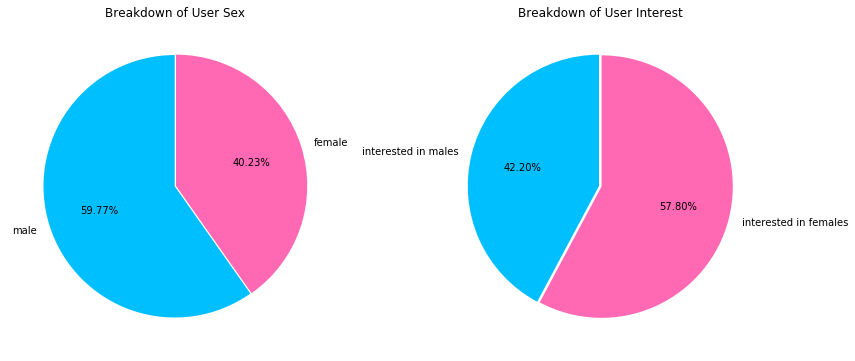

In [572]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(121)
plt.pie(df.sex.value_counts(), labels=['male','female'], colors=['deepskyblue','hotpink'], explode=(0,0.01), startangle=90, autopct='%1.2f%%')
plt.title('Breakdown of User Sex')

ax1 = plt.subplot(122)
plt.pie([interest_males, interest_females], labels=['interested in males','interested in females'], colors=['deepskyblue','hotpink'], explode=(0.01, 0.01), startangle=90, autopct='%1.2f%%')
plt.title('Breakdown of User Interest')

plt.tight_layout()
plt.show()

### Diet and Body Type

In [146]:
df.body_type.value_counts()

average           14641
fit               12703
athletic          11806
not_answered       5275
thin               4709
curvy              3920
a little extra     2627
skinny             1777
full figured       1009
overweight          442
jacked              409
used up             347
rather not say      197
Name: body_type, dtype: int64

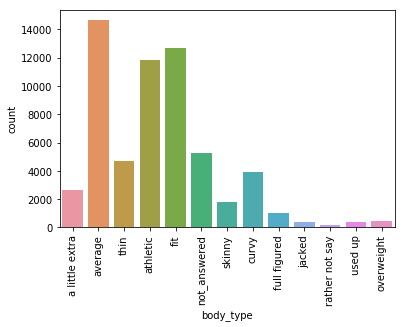

In [147]:
sns.countplot(data=df, x='body_type')
plt.xticks(rotation='vertical')
plt.show()

In [148]:
pd.crosstab(df.diet,df.body_type,margins=True)

body_type,a little extra,athletic,average,curvy,fit,full figured,jacked,not_answered,overweight,rather not say,skinny,thin,used up,All
diet,,,,,,,,,,,,,,
anything,2367,10400,12967,3248,10888,886,328,4819,384,171,1527,3947,274,52206
halal,6,25,12,2,12,1,5,3,1,0,2,4,4,77
kosher,4,23,19,7,20,6,6,6,0,2,7,11,4,115
other,78,417,406,164,376,51,32,61,19,8,31,103,34,1780
vegan,26,100,152,52,152,2,9,61,7,3,36,94,8,702
vegetarian,146,841,1085,447,1255,63,29,325,31,13,174,550,23,4982
All,2627,11806,14641,3920,12703,1009,409,5275,442,197,1777,4709,347,59862


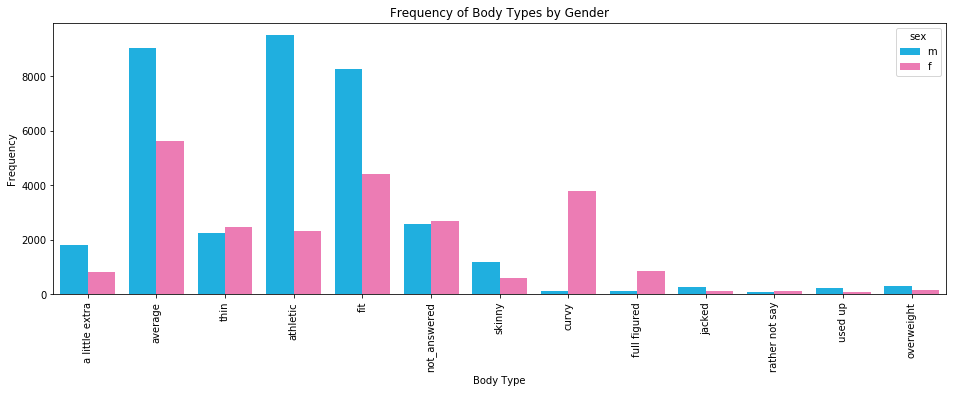

In [642]:
colors=['deepskyblue','hotpink']

plt.figure(figsize=(16,5))
sns.countplot(data=df, x='body_type', hue='sex', palette=colors)
plt.title('Frequency of Body Types by Gender')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Education and Job

In [149]:
pd.crosstab(df.education,df.job,margins=True)

job,art_music_writing,banking_financial_realestate,clerical_administrative,computer_hardware_software,construction_craftmanship,education_academia,entertainment_media,executive_management,hospitality_travel,law_legal,medicine_health,military,not_answered,other,politician_government,retired,sales_marketing_business,science_tech_engineering,student,transportation,unemployed,All
education,,,,,,,,,,,,,,,,,,,,,,
college,2903,1512,595,3111,592,1603,1592,1237,995,392,1679,117,3695,4709,397,125,3196,2596,3035,226,149,34456
grad,842,556,58,1067,72,1766,378,867,67,898,1581,22,1478,1394,259,63,690,1891,1417,28,25,15419
highschool,355,41,68,197,195,60,124,97,135,27,145,43,350,753,26,39,204,151,242,50,74,3376
not_answered,334,155,84,329,161,79,153,170,166,61,272,21,3088,725,24,21,300,205,179,61,23,6611
All,4434,2264,805,4704,1020,3508,2247,2371,1363,1378,3677,203,8611,7581,706,248,4390,4843,4873,365,271,59862


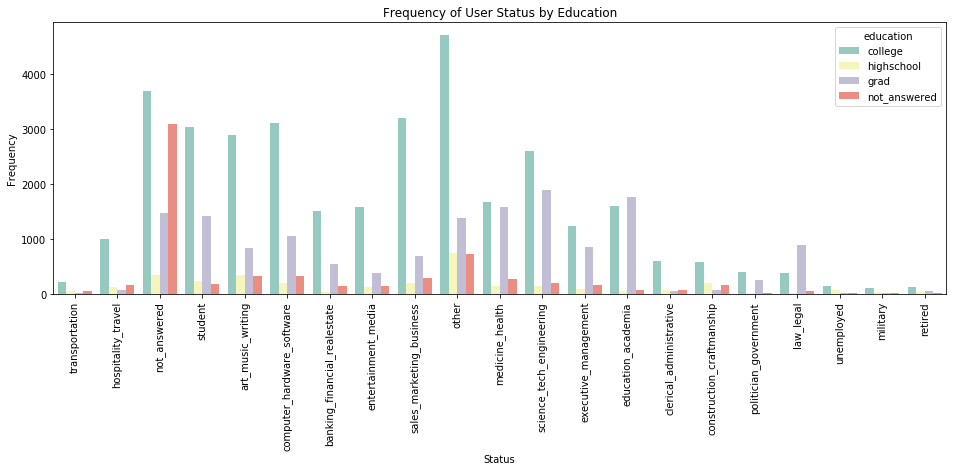

In [641]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='job', hue='education', palette='Set3')
plt.title('Frequency of User Status by Education')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

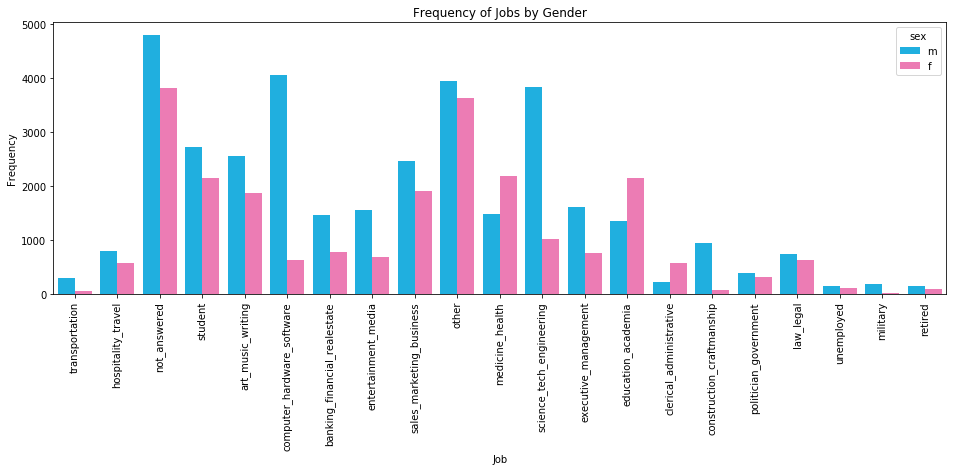

In [639]:
colors=['deepskyblue','hotpink']

plt.figure(figsize=(16,5))
sns.countplot(data=df, x='job', hue='sex', palette=colors)
plt.title('Frequency of Jobs by Gender')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Ethnicity

### Religion

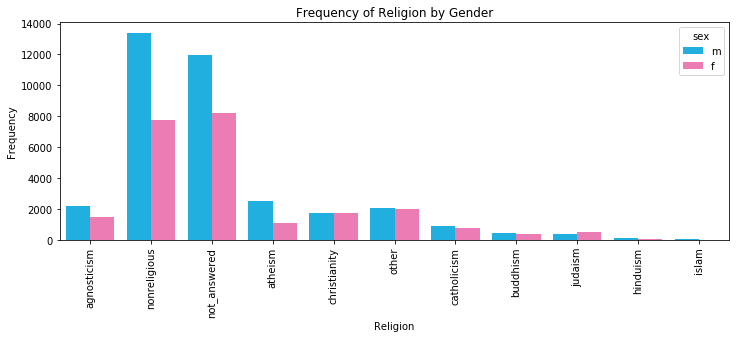

In [664]:
colors=['deepskyblue','hotpink']

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='religion', hue='sex', palette=colors)
plt.title('Frequency of Religion by Gender')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Drinking, Smoking, and Drugs Habits

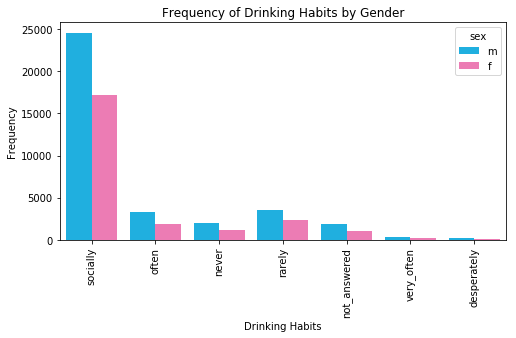

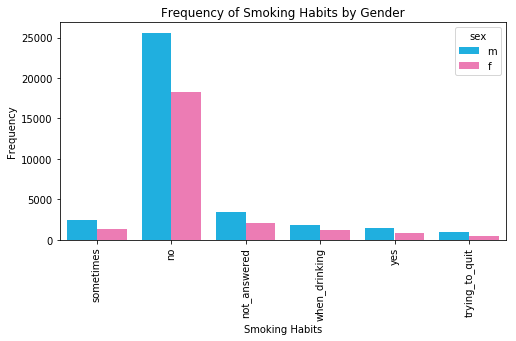

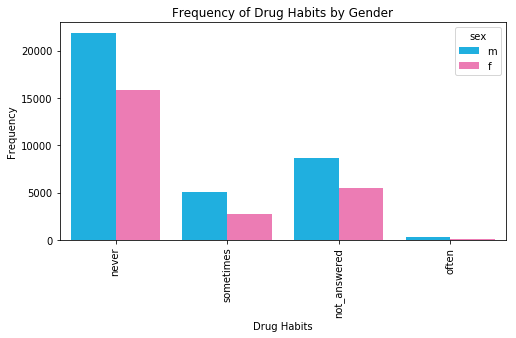

In [666]:
colors=['deepskyblue','hotpink']

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='drinks', hue='sex', palette=colors)
plt.title('Frequency of Drinking Habits by Gender')
plt.xlabel('Drinking Habits')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='smokes', hue='sex', palette=colors)
plt.title('Frequency of Smoking Habits by Gender')
plt.xlabel('Smoking Habits')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='drugs', hue='sex', palette=colors)
plt.title('Frequency of Drug Habits by Gender')
plt.xlabel('Drug Habits')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

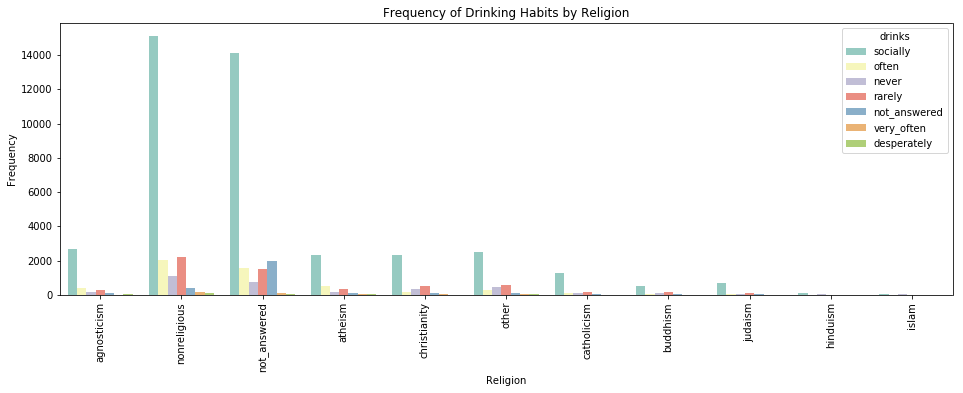

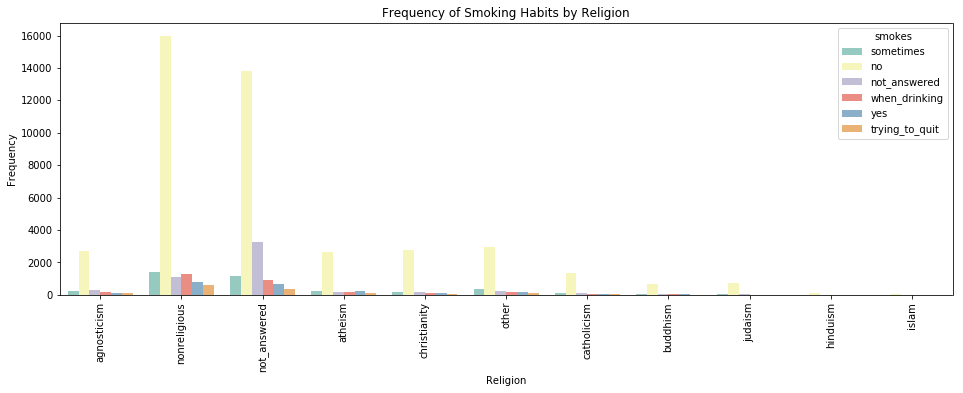

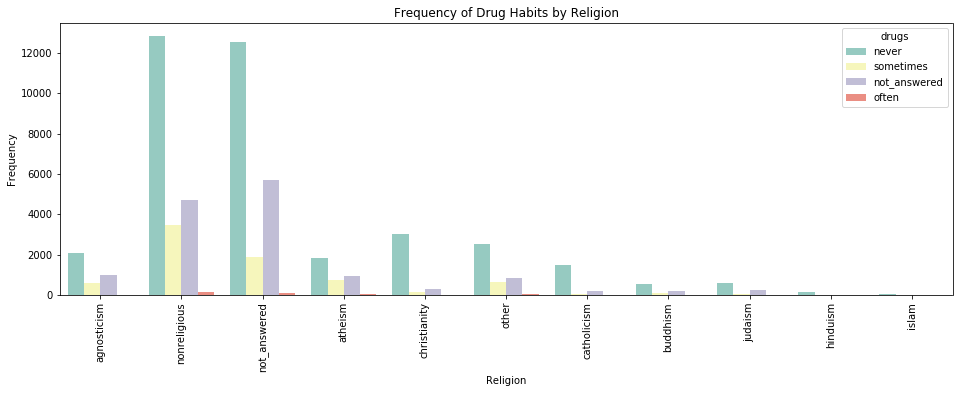

In [672]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='religion', hue='drinks', palette='Set3')
plt.title('Frequency of Drinking Habits by Religion')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(data=df, x='religion', hue='smokes', palette='Set3')
plt.title('Frequency of Smoking Habits by Religion')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(data=df, x='religion', hue='drugs', palette='Set3')
plt.title('Frequency of Drug Habits by Religion')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

## Preparing the Data for Modeling

### Multicollinearity Heat Map

The heat map reveals information regarding the relationship between the different features. A high value (indicated by a value that's close to either -1 or 1) can indicate concern, as that means that the features involved might influence each other and give inaccurate information regarding their predictive ability for the target.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59862 entries, 0 to 59945
Data columns (total 25 columns):
age                          59862 non-null int64
body_type                    59862 non-null object
diet                         59862 non-null object
drinks                       59862 non-null object
drugs                        59862 non-null object
education                    59862 non-null object
height                       59862 non-null float64
job                          59862 non-null object
orientation                  59862 non-null object
religion                     59862 non-null object
sex                          59862 non-null object
smokes                       59862 non-null object
speaks                       59862 non-null object
status                       59862 non-null object
ethnicity_asian              59862 non-null object
ethnicity_black              59862 non-null object
ethnicity_hispanic           59862 non-null object
ethnicity_indian        

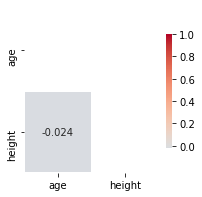

In [431]:
import seaborn as sns
f, ax = plt.subplots(figsize=(3, 3))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(df.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0, linewidth=0.3, cmap='coolwarm');

### Standard Scaler

The continuous features need to be scaled to the same scale to analyze them without distorted weighting, as the scales for each may differ. Standard Scaler transforms the data in each feature to have a mean of 0 and a standard deviation of 1.

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [154]:
df_scale = df.copy(deep=True)

In [155]:
df_scale[numeric_cols] = sc.fit_transform(df_scale[numeric_cols])

In [156]:
df_scale.describe()

,age,height
count,5.986200e+04,5.986200e+04
mean,-2.008350e-16,1.052603e-15
std,1.000008e+00,1.000008e+00
min,-1.518676e+00,-3.193873e+00
25%,-6.714429e-01,-5.976599e-01
50%,-2.478262e-01,-7.841724e-02
75%,4.935030e-01,7.004467e-01
max,3.882436e+00,4.075524e+00


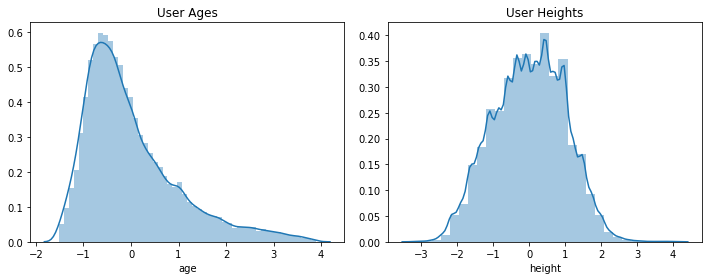

In [157]:
# Histograms

fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
plt.title('User Ages')
sns.distplot(df_scale.age, bins=52)

ax2 = plt.subplot(122)
sns.distplot(df_scale.height, bins=29)
plt.title('User Heights')

plt.tight_layout()
plt.show()

In [158]:
for each in list(numeric_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df_scale[each]),3))+' and the kurtosis is '+str(round(kurtosis(df_scale[each]),3)))

For age the skew is 1.253 and the kurtosis is 1.445
For height the skew is -0.047 and the kurtosis is -0.432


### Log Transform

Regression tasks only work with data that is close to normal, for accurate predictive value. The two continuous variables are slightly skewed. I will perform a log transformation to see if it helps normalize the data.

In [159]:
df_log = df_scale.copy(deep=True)

In [160]:
for c in [numeric_cols]:
    df_log[c] = np.log(df_log[c]+3.5)

In [161]:
len(df)

59862

In [162]:
df_log.isna().any()

age                          False
body_type                    False
diet                         False
drinks                       False
drugs                        False
education                    False
height                       False
job                          False
orientation                  False
religion                     False
sex                          False
smokes                       False
speaks                       False
status                       False
ethnicity_asian              False
ethnicity_black              False
ethnicity_hispanic           False
ethnicity_indian             False
ethnicity_middle_eastern     False
ethnicity_native_american    False
ethnicity_white              False
ethnicity_other              False
ethnicity_not_answered       False
cat_person                   False
dog_person                   False
dtype: bool

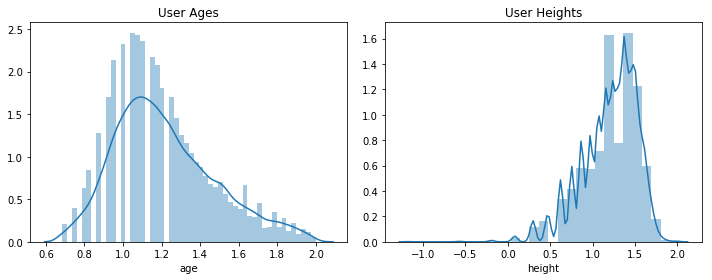

In [163]:
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
plt.title('User Ages')
sns.distplot(df_log.age, bins=52)

ax2 = plt.subplot(122)
sns.distplot(df_log.height, bins=29)
plt.title('User Heights')

plt.tight_layout()
plt.show()

In [164]:
for each in list(numeric_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df_log[each]),3))+' and the kurtosis is '+str(round(kurtosis(df_log[each]),3)))

For age the skew is 0.6 and the kurtosis is -0.048
For height the skew is -0.897 and the kurtosis is 1.157


In [165]:
df_log.describe()

,age,height
count,59862.000000,59862.000000
mean,1.216736,1.206063
std,0.261781,0.319850
min,0.683765,-1.183755
25%,1.039767,1.065517
50%,1.179324,1.230103
75%,1.384669,1.435191
max,1.999104,2.024922


The non-transformed version looks more normal, so I will use that one for modeling.

In [166]:
df_use = df_scale.copy(deep=True)

### One Hot Encoding

Categorical data must be transformed to numeric data for modeling. To do that, I will use one hot encoding, which breaks the options for each feature into individual columns, detailing whether or not the entry for that line contains each feature option.

In [167]:
view(df_use,3)

,age,body_type,diet,drinks,drugs,education,height,job,orientation,religion,sex,smokes,speaks,status,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_indian,ethnicity_middle_eastern,ethnicity_native_american,ethnicity_white,ethnicity_other,ethnicity_not_answered,cat_person,dog_person
0,-1.095060,a little extra,anything,socially,never,college,1.738932,transportation,straight,agnosticism,m,sometimes,english_only,single,True,False,False,False,False,False,True,False,False,True,True
1,0.281695,average,other,often,sometimes,highschool,0.440825,hospitality_travel,straight,nonreligious,m,no,multilingual,single,False,False,False,False,False,False,True,False,False,True,True
2,0.599407,thin,anything,socially,not_answered,grad,-0.078417,not_answered,straight,not_answered,m,no,multilingual,available,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59943,1.023024,average,anything,never,never,grad,0.700447,construction_craftmanship,straight,nonreligious,m,no,english_only,single,True,False,False,False,False,False,False,False,False,False,False
59944,-0.565539,athletic,anything,socially,often,college,1.219689,medicine_health,straight,nonreligious,m,trying_to_quit,multilingual,single,True,True,False,False,False,False,False,False,False,True,True
59945,0.705311,average,anything,socially,not_answered,grad,-0.078417,medicine_health,gay,nonreligious,m,sometimes,english_only,single,False,False,False,False,False,False,True,False,False,True,True


In [168]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59862 entries, 0 to 59945
Data columns (total 25 columns):
age                          59862 non-null float64
body_type                    59862 non-null object
diet                         59862 non-null object
drinks                       59862 non-null object
drugs                        59862 non-null object
education                    59862 non-null object
height                       59862 non-null float64
job                          59862 non-null object
orientation                  59862 non-null object
religion                     59862 non-null object
sex                          59862 non-null object
smokes                       59862 non-null object
speaks                       59862 non-null object
status                       59862 non-null object
ethnicity_asian              59862 non-null object
ethnicity_black              59862 non-null object
ethnicity_hispanic           59862 non-null object
ethnicity_indian      

In [169]:
X = df_use.drop(columns=['sex']) # Features
y = df_use['sex'] # Target

In [170]:
# Get dummies

X = pd.get_dummies(X, drop_first=True)

In [171]:
# Preview one hot encoded features

view(X,2)

,age,height,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_not_answered,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_never,drinks_not_answered,drinks_often,drinks_rarely,drinks_socially,drinks_very_often,drugs_not_answered,drugs_often,drugs_sometimes,education_grad,education_highschool,education_not_answered,job_banking_financial_realestate,job_clerical_administrative,job_computer_hardware_software,job_construction_craftmanship,job_education_academia,job_entertainment_media,job_executive_management,job_hospitality_travel,job_law_legal,job_medicine_health,job_military,job_not_answered,job_other,job_politician_government,job_retired,job_sales_marketing_business,job_science_tech_engineering,job_student,job_transportation,job_unemployed,orientation_gay,orientation_straight,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_nonreligious,religion_not_answered,religion_other,smokes_not_answered,smokes_sometimes,smokes_trying_to_quit,smokes_when_drinking,smokes_yes,speaks_multilingual,status_married,status_seeing someone,status_single,status_unknown,ethnicity_asian_True,ethnicity_black_True,ethnicity_hispanic_True,ethnicity_indian_True,ethnicity_middle_eastern_True,ethnicity_native_american_True,ethnicity_white_True,ethnicity_other_True,ethnicity_not_answered_True,cat_person_True,dog_person_True
0,-1.095060,1.738932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
1,0.281695,0.440825,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59944,-0.565539,1.219689,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1
59945,0.705311,-0.078417,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1


In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
y.replace({'m':0, 'f':1}, inplace=True)

#### _Export in case kernel needs to restart_

In [174]:
# Saving the cleaned features set
X.to_csv('features.csv')

# Saving the cleaned target variable
y.to_csv('target.txt')

### Importing Packages for Modeling

In [175]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
import itertools

In [178]:
# Defining a function to plot a confusion matrix

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

### Train-Test Split

In [176]:
# Separating the data into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f"Training set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")

Training set has 47889 samples
Testing set has 11973 samples


## Modeling

The focus of this project is to use Deep Learning to make predictions. Before I do that, I will run a quick vanilla logistic regression and XGBoost model to get a brief look at what the classification results look like from these models. Both of these models also allow me to observe the ranked feature importance from their results, which will be helpful in interpreting the models.

### Vanilla Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
# Instantiate the logistic regression

logreg = LogisticRegression()

In [181]:
# Fit the model

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
# Predictions
train_preds_logreg = logreg.predict(X_train)
test_preds_logreg = logreg.predict(X_test)

# Logistic regression scores
train_accuracy_logreg = accuracy_score(y_train, train_preds_logreg)
test_accuracy_logreg = accuracy_score(y_test, test_preds_logreg)
report_logreg = classification_report(y_test, test_preds_logreg)

# Print scores
print("Logistic Regression")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")
print()
print("\nClassification report:")
print(report_logreg)
print()

Logistic Regression
-------------------------
Training Accuracy: 88.3%
Test Accuracy:     88.11%


Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7141
           1       0.87      0.84      0.85      4832

   micro avg       0.88      0.88      0.88     11973
   macro avg       0.88      0.87      0.88     11973
weighted avg       0.88      0.88      0.88     11973




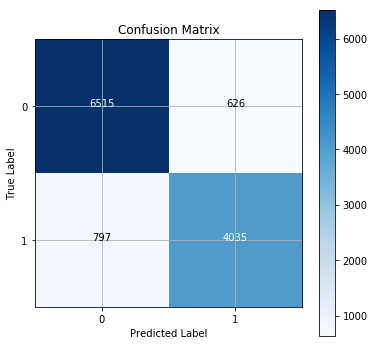

In [183]:
# Confusion matrix

plt.figure(figsize=(6,6))
plot_cf(y_test, test_preds_logreg);

AUC: 0.8737


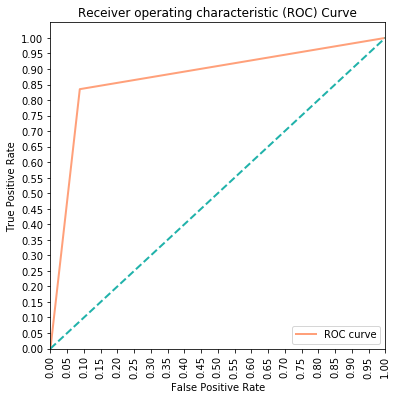

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_logreg)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)],rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

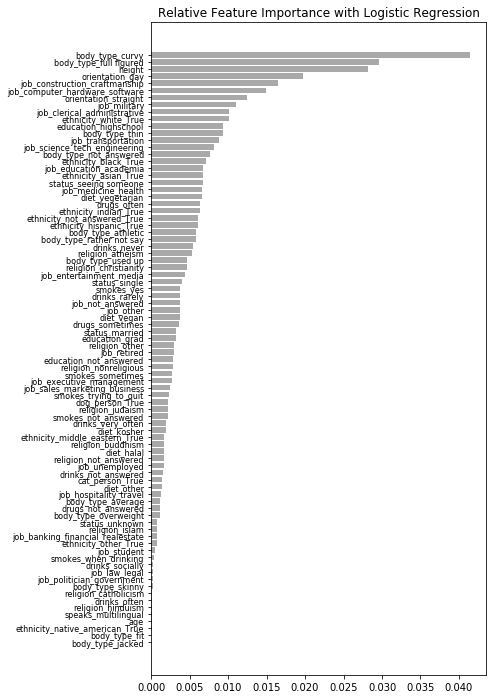

In [185]:
feat_importances_logreg = abs(logreg.coef_[0])/100
sorted_idx = np.argsort(feat_importances_logreg)
pos = np.arange(sorted_idx.shape[0])

featfig = plt.figure(figsize=(6,12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feat_importances_logreg[sorted_idx], align='center', color='darkgrey')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_title('Relative Feature Importance with Logistic Regression');

In [186]:
print('10 Most Important Features from Logistic Regression: ')
list(np.array(X.columns)[sorted_idx[::-1]][:10])

10 Most Important Features from Logistic Regression: 


['body_type_curvy',
 'body_type_full figured',
 'height',
 'orientation_gay',
 'job_construction_craftmanship',
 'job_computer_hardware_software',
 'orientation_straight',
 'job_military',
 'job_clerical_administrative',
 'ethnicity_white_True']

In [187]:
print('10 Least Important Features from Logistic Regression: ')
list(np.array(X.columns)[sorted_idx[::-1]][-10:])

10 Least Important Features from Logistic Regression: 


['job_politician_government',
 'body_type_skinny',
 'religion_catholicism',
 'drinks_often',
 'religion_hinduism',
 'speaks_multilingual',
 'age',
 'ethnicity_native_american_True',
 'body_type_fit',
 'body_type_jacked']

The accuracy for our first model, which is a vanilla logistic regression, is actually pretty good. It has an 88.3% accuracy in predicting the training values and an 88.11% accuracy in predicting the test values.

From the logistic regression results, we can also see some trends in the weighting it assigns to the different features. It seems that certain body types tend to be more indicative in predicting gender than others are.

In [530]:
# Creating a dataframe to store the model scores

models = pd.DataFrame()

In [531]:
score_logreg = ['Logistic Regression', train_accuracy_logreg, test_accuracy_logreg]
models = models.append([score_logreg])

### XGBoost

In [188]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [189]:
import xgboost as xgb

In [190]:
# instantiate
booster = xgb.XGBClassifier()

# train the xgboost
booster.fit(X_train, y_train)

# predict
train_preds_booster = booster.predict(X_train)
test_preds_booster = booster.predict(X_test)

# evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds_booster)
test_accuracy_booster = accuracy_score(y_test, test_preds_booster)
report_booster = classification_report(y_test, test_preds_booster)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

print("\nClassification report:")
print(report_booster)
print()

XGBoost
-------------------------
Training Accuracy: 87.91%
Test Accuracy:     88.11%

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7141
           1       0.87      0.82      0.85      4832

   micro avg       0.88      0.88      0.88     11973
   macro avg       0.88      0.87      0.88     11973
weighted avg       0.88      0.88      0.88     11973




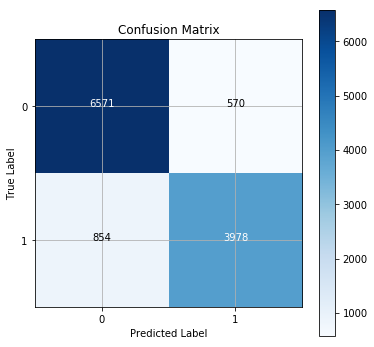

In [191]:
# Confusion matrix

plt.figure(figsize=(6,6))
plot_cf(y_test, test_preds_booster);

AUC: 0.87172


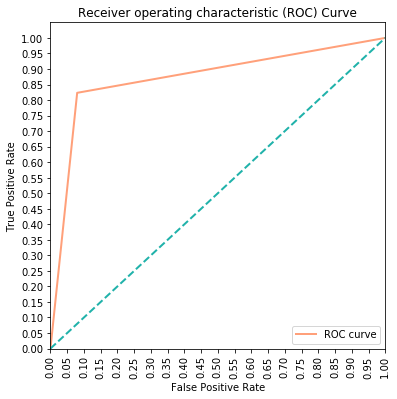

In [192]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_booster)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [193]:
booster_feat_weights = pd.DataFrame(booster.feature_importances_, 
                                    columns=['weight'], 
                                    index=X.columns).sort_values('weight', ascending=False)

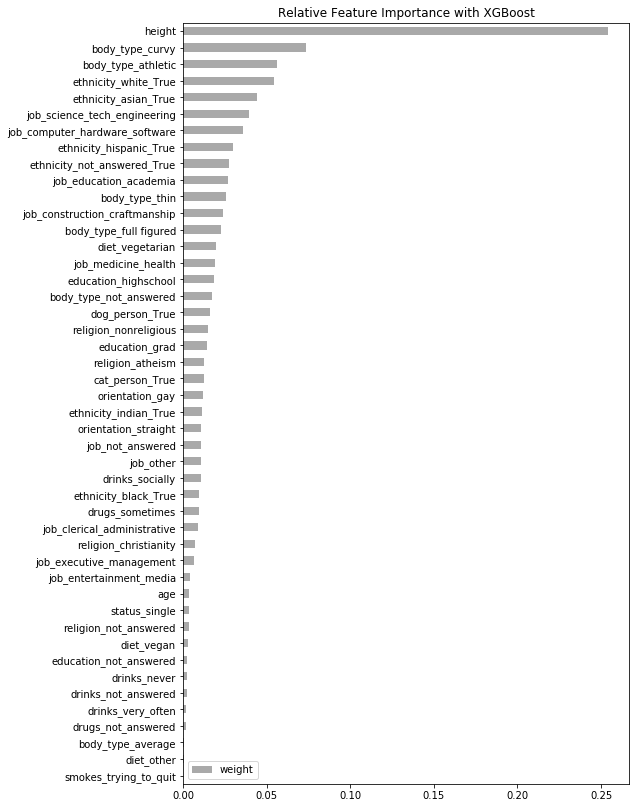

In [194]:
booster_feat_weights[booster_feat_weights.weight>0].sort_values('weight', ascending=True).plot(kind='barh', color='darkgrey', figsize=(8,14))
plt.title('Relative Feature Importance with XGBoost');

In [195]:
print('15 Most Important Features from XGBoost:')
booster_feat_weights.sort_values('weight',ascending=False).head(15)

15 Most Important Features from XGBoost:


,weight
height,0.254159
body_type_curvy,0.073457
body_type_athletic,0.056506
ethnicity_white_True,0.054420
ethnicity_asian_True,0.044441
job_science_tech_engineering,0.039241
job_computer_hardware_software,0.035921
ethnicity_hispanic_True,0.030210
ethnicity_not_answered_True,0.027795
job_education_academia,0.026957


In [196]:
print('Least Important Features from XGBoost:')
print(f'({len(booster_feat_weights[booster_feat_weights.weight==0])} features with weight of 0.0)')
booster_feat_weights[booster_feat_weights.weight==0]

Least Important Features from XGBoost:
(38 features with weight of 0.0)


,weight
ethnicity_other_True,0.0
status_married,0.0
smokes_sometimes,0.0
smokes_when_drinking,0.0
smokes_yes,0.0
speaks_multilingual,0.0
status_unknown,0.0
status_seeing someone,0.0
body_type_jacked,0.0
body_type_skinny,0.0


**Note:** I want to try running XGBoost again later after removing these 38 features to compare the results.

In [533]:
score_xgb = ['XGBoost', train_accuracy_booster, test_accuracy_booster]
models = models.append([score_xgb])

### Neural Network Model 1: Baseline

In [340]:
from keras import models, layers, optimizers, regularizers
from keras.callbacks import EarlyStopping

In [341]:
model = models.Sequential()

model.add(layers.Dense(12, 
                       kernel_initializer='uniform', 
                       activation='relu', 
                       input_shape=(X_train.shape[1],)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Note:** I first tried my baseline model with 3 layers, and then with 4. The 4-layer neural network had slightly better results, so I decided to go with 4.

In [342]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [343]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [344]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 1s 24us/step - loss: 0.6293 - acc: 0.7810 - val_loss: 0.5058 - val_acc: 0.8707
Epoch 2/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3785 - acc: 0.8747 - val_loss: 0.2985 - val_acc: 0.8828
Epoch 3/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2903 - acc: 0.8800 - val_loss: 0.2782 - val_acc: 0.8838
Epoch 4/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2835 - acc: 0.8809 - val_loss: 0.2767 - val_acc: 0.8850
Epoch 5/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2822 - acc: 0.8809 - val_loss: 0.2755 - val_acc: 0.8857
Epoch 6/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2813 - acc: 0.8811 - val_loss: 0.2740 - val_acc: 0.8859
Epoch 7/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.2803 - acc: 0.8821 - val_loss: 0.2738 - val_acc: 0.884

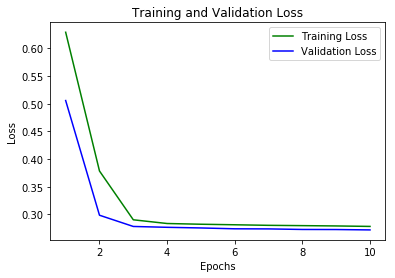

In [345]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'green', label='Training Loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

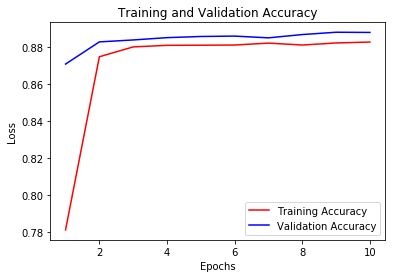

In [346]:
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'red', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [347]:
base_train_loss, base_train_acc = model.evaluate(X_train, y_train)
print(f'Base Train Loss:      {(base_train_loss * 100):.4}%')
print(f'Base Train Accuracy:  {(base_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 17us/step
Base Train Loss:      27.56%
Base Train Accuracy:  88.45%


In [348]:
base_test_loss, base_test_acc = model.evaluate(X_test, y_test)
print(f'Base Test Loss:      {(base_test_loss * 100):.4}%')
print(f'Base Test Accuracy:  {(base_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 15us/step
Base Test Loss:      28.15%
Base Test Accuracy:  88.31%


In [349]:
base_hat_test = model.predict(X_test)

AUC: 0.94913


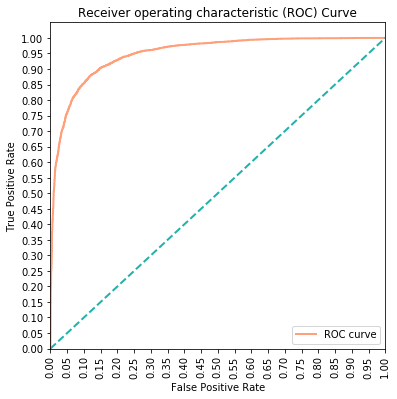

In [350]:
fpr, tpr, thresholds = roc_curve(y_test, base_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [534]:
score_NN1 = ['Baseline NN', base_train_acc, base_test_acc]
models = models.append([score_NN1])

### Neural Network Model 2: L1 Regularization

In [351]:
model2 = models.Sequential()

model2.add(layers.Dense(12, 
                       kernel_regularizer=regularizers.l1(0.005), 
                       activation='relu', 
                       input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(6, 
                        kernel_regularizer=regularizers.l1(0.005),
                        activation='relu'))
model2.add(layers.Dense(6, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [352]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [353]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [354]:
history2 = model2.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 1s 26us/step - loss: 1.2584 - acc: 0.6079 - val_loss: 1.0038 - val_acc: 0.7941
Epoch 2/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.7919 - acc: 0.8438 - val_loss: 0.6221 - val_acc: 0.8702
Epoch 3/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.5447 - acc: 0.8706 - val_loss: 0.4808 - val_acc: 0.8758
Epoch 4/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4624 - acc: 0.8727 - val_loss: 0.4390 - val_acc: 0.8764
Epoch 5/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4346 - acc: 0.8726 - val_loss: 0.4172 - val_acc: 0.8772
Epoch 6/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4161 - acc: 0.8735 - val_loss: 0.4026 - val_acc: 0.8773
Epoch 7/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4013 - acc: 0.8746 - val_loss: 0.3875 - val_acc: 0.878

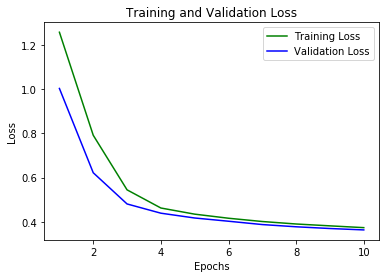

In [355]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(loss_values2) + 1)
plt.plot(epochs2, loss_values2, 'green', label='Training Loss')
plt.plot(epochs2, val_loss_values2, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

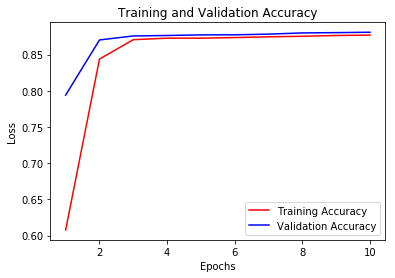

In [356]:
acc_values2 = history_dict2['acc'] 
val_acc_values2 = history_dict2['val_acc']

plt.plot(epochs2, acc_values2, 'red', label='Training Accuracy')
plt.plot(epochs2, val_acc_values2, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [357]:
model2_train_loss, model2_train_acc = model2.evaluate(X_train, y_train)
print(f'Model 2 Train Loss:      {(model2_train_loss * 100):.4}%')
print(f'Model 2 Train Accuracy:  {(model2_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 16us/step
Model 2 Train Loss:      36.85%
Model 2 Train Accuracy:  87.74%


In [358]:
model2_test_loss, model2_test_acc = model2.evaluate(X_test, y_test)
print(f'Model 2 Test Loss:      {(model2_test_loss * 100):.4}%')
print(f'Model 2 Test Accuracy:  {(model2_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 17us/step
Model 2 Test Loss:      37.15%
Model 2 Test Accuracy:  87.87%


In [359]:
model2_hat_test = model2.predict(X_test)

AUC: 0.94623


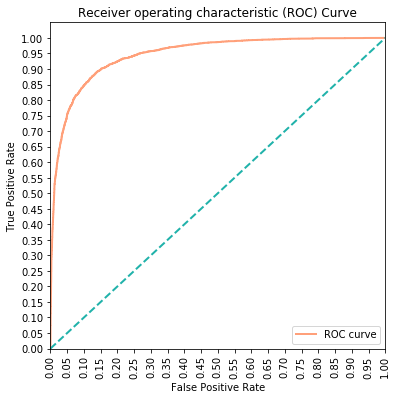

In [360]:
fpr, tpr, thresholds = roc_curve(y_test, model2_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [535]:
score_NN2 = ['NN: L1 Regularization', model2_train_acc, model2_test_acc]
models = models.append([score_NN2])

### Neural Network Model 3: L2 Regularization

In [361]:
model3 = models.Sequential()
model3.add(layers.Dense(12, 
                       kernel_regularizer=regularizers.l2(0.005), 
                       activation='relu', 
                       input_shape=(X_train.shape[1],)))
model3.add(layers.Dense(6, 
                        kernel_regularizer=regularizers.l2(0.005),
                        activation='relu'))
model3.add(layers.Dense(6, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [362]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_50 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_51 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [363]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [364]:
history3 = model3.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 1s 29us/step - loss: 0.7913 - acc: 0.6457 - val_loss: 0.6777 - val_acc: 0.8213
Epoch 2/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.5532 - acc: 0.8539 - val_loss: 0.4321 - val_acc: 0.8757
Epoch 3/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3913 - acc: 0.8753 - val_loss: 0.3611 - val_acc: 0.8802
Epoch 4/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.3559 - acc: 0.8781 - val_loss: 0.3416 - val_acc: 0.8812
Epoch 5/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.3431 - acc: 0.8791 - val_loss: 0.3363 - val_acc: 0.8819
Epoch 6/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.3353 - acc: 0.8799 - val_loss: 0.3253 - val_acc: 0.8826
Epoch 7/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3294 - acc: 0.8799 - val_loss: 0.3201 - val_acc: 0.883

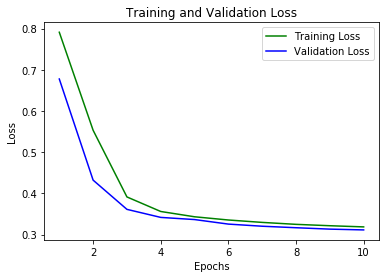

In [365]:
history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

epochs3 = range(1, len(loss_values3) + 1)
plt.plot(epochs3, loss_values3, 'green', label='Training Loss')
plt.plot(epochs3, val_loss_values3, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

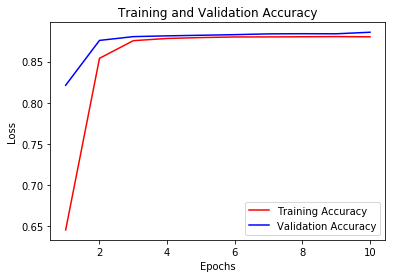

In [366]:
acc_values3 = history_dict3['acc'] 
val_acc_values3 = history_dict3['val_acc']

plt.plot(epochs3, acc_values3, 'red', label='Training Accuracy')
plt.plot(epochs3, val_acc_values3, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [368]:
model3_train_loss, model3_train_acc = model3.evaluate(X_train, y_train)
print(f'Model 3 Train Loss:      {(model3_train_loss * 100):.4}%')
print(f'Model 3 Train Accuracy:  {(model3_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 17us/step
Model 3 Train Loss:      31.56%
Model 3 Train Accuracy:  88.19%


In [369]:
model3_test_loss, model3_test_acc = model3.evaluate(X_test, y_test)
print(f'Model 3 Test Loss:      {(model3_test_loss * 100):.4}%')
print(f'Model 3 Test Accuracy:  {(model3_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 17us/step
Model 3 Test Loss:      31.93%
Model 3 Test Accuracy:  88.11%


In [370]:
model3_hat_test = model2.predict(X_test)

AUC: 0.94623


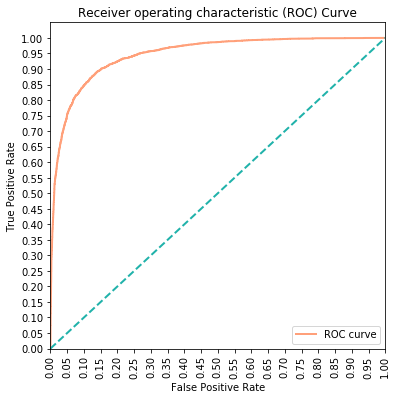

In [371]:
fpr, tpr, thresholds = roc_curve(y_test, model3_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [536]:
score_NN3 = ['NN: L2 Regularization', model3_train_acc, model3_test_acc]
models = models.append([score_NN3])

### Neural Network Model 4: Dropout Regularization

In [372]:
model4 = models.Sequential()

model4.add(layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(layers.Dense(6, activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(6, activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(1, activation='sigmoid'))

In [373]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_54 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [374]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [375]:
history4 = model4.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 1s 29us/step - loss: 0.6304 - acc: 0.6416 - val_loss: 0.5103 - val_acc: 0.8484
Epoch 2/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.5034 - acc: 0.7535 - val_loss: 0.3625 - val_acc: 0.8736
Epoch 3/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4354 - acc: 0.7884 - val_loss: 0.3154 - val_acc: 0.8785
Epoch 4/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4015 - acc: 0.8195 - val_loss: 0.2973 - val_acc: 0.8806
Epoch 5/10
38311/38311 [==============================] - 0s 6us/step - loss: 0.3816 - acc: 0.8305 - val_loss: 0.2894 - val_acc: 0.8815
Epoch 6/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3724 - acc: 0.8277 - val_loss: 0.2844 - val_acc: 0.8839
Epoch 7/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3670 - acc: 0.8286 - val_loss: 0.2831 - val_acc: 0.883

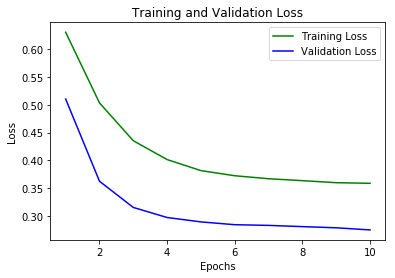

In [376]:
history_dict4 = history4.history
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']

epochs4 = range(1, len(loss_values4) + 1)
plt.plot(epochs4, loss_values4, 'g', label='Training Loss')
plt.plot(epochs4, val_loss_values4, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

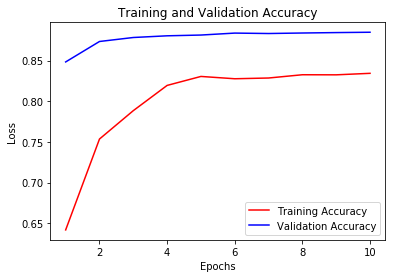

In [377]:
acc_values4 = history_dict4['acc'] 
val_acc_values4 = history_dict4['val_acc']

plt.plot(epochs4, acc_values4, 'r', label='Training Accuracy')
plt.plot(epochs4, val_acc_values4, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [378]:
model4_train_loss, model4_train_acc = model4.evaluate(X_train, y_train)
print(f'Model 4 Train Loss:      {(model4_train_loss * 100):.4}%')
print(f'Model 4 Train Accuracy:  {(model4_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 17us/step
Model 4 Train Loss:      27.83%
Model 4 Train Accuracy:  88.36%


In [379]:
model4_test_loss, model4_test_acc = model4.evaluate(X_test, y_test)
print(f'Model 4 Test Loss:      {(model4_test_loss * 100):.4}%')
print(f'Model 4 Test Accuracy:  {(model4_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 18us/step
Model 4 Test Loss:      28.45%
Model 4 Test Accuracy:  88.13%


In [380]:
model4_hat_test = model4.predict(X_test)

AUC: 0.94847


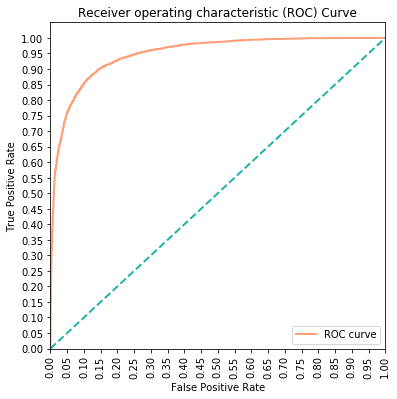

In [381]:
fpr, tpr, thresholds = roc_curve(y_test, model4_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [537]:
score_NN4 = ['NN: Dropout Regularization', model4_train_acc, model4_test_acc]
models = models.append([score_NN4])

### Neural Network Model 5: Dropping Features Indicated Insignificant by XGBoost

In [382]:
X2 = X.drop(columns=list(booster_feat_weights[booster_feat_weights.weight==0].index))

In [383]:
# Separating the data into a training and testing set

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=2)

print(f"Training set has {X2_train.shape[0]} samples")
print(f"Testing set has {X2_test.shape[0]} samples")

Training set has 47889 samples
Testing set has 11973 samples


In [384]:
model5 = models.Sequential()

model5.add(layers.Dense(12, 
                       kernel_initializer='uniform', 
                       activation='relu', 
                       input_shape=(X2_train.shape[1],)))
model5.add(layers.Dense(6, activation='relu'))
model5.add(layers.Dense(6, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

**Note:** I first tried my baseline model with 3 layers, and then with 4. The 4-layer neural network had slightly better results, so I decided to go with 4.

In [385]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 12)                564       
_________________________________________________________________
dense_58 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_59 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 7         
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [386]:
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [387]:
history5 = model5.fit(X2_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 1s 29us/step - loss: 0.6604 - acc: 0.7448 - val_loss: 0.5866 - val_acc: 0.8649
Epoch 2/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.4706 - acc: 0.8696 - val_loss: 0.3538 - val_acc: 0.8797
Epoch 3/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.3151 - acc: 0.8770 - val_loss: 0.2847 - val_acc: 0.8814
Epoch 4/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2879 - acc: 0.8799 - val_loss: 0.2770 - val_acc: 0.8824
Epoch 5/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2851 - acc: 0.8804 - val_loss: 0.2754 - val_acc: 0.8829
Epoch 6/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2837 - acc: 0.8812 - val_loss: 0.2747 - val_acc: 0.8852
Epoch 7/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.2831 - acc: 0.8809 - val_loss: 0.2740 - val_acc: 0.883

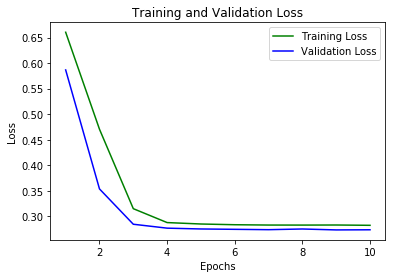

In [388]:
history_dict5 = history5.history
loss_values5 = history_dict5['loss']
val_loss_values5 = history_dict5['val_loss']

epochs5 = range(1, len(loss_values5) + 1)
plt.plot(epochs5, loss_values5, 'green', label='Training Loss')
plt.plot(epochs5, val_loss_values5, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

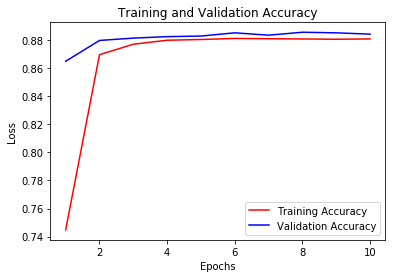

In [389]:
acc_values5 = history_dict5['acc'] 
val_acc_values5 = history_dict5['val_acc']

plt.plot(epochs5, acc_values5, 'red', label='Training Accuracy')
plt.plot(epochs5, val_acc_values5, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [390]:
model5_train_loss, model5_train_acc = model5.evaluate(X2_train, y_train)
print(f'Model 5 Train Loss:      {(model5_train_loss * 100):.4}%')
print(f'Model 5 Train Accuracy:  {(model5_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 16us/step
Model 5 Train Loss:      28.02%
Model 5 Train Accuracy:  88.17%


In [391]:
model5_test_loss, model5_test_acc = model5.evaluate(X2_test, y_test)
print(f'Model 5 Test Loss:      {(model5_test_loss * 100):.4}%')
print(f'Model 5 Test Accuracy:  {(model5_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 17us/step
Model 5 Test Loss:      28.39%
Model 5 Test Accuracy:  88.22%


In [392]:
model5_hat_test = model5.predict(X2_test)

AUC: 0.94843


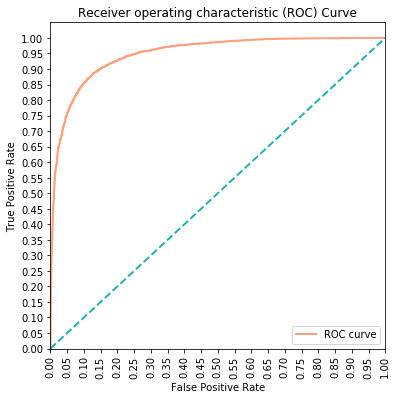

In [393]:
fpr, tpr, thresholds = roc_curve(y_test, model5_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [538]:
score_NN5 = ['NN: Dropping Features', model5_train_acc, model5_test_acc]
models = models.append([score_NN5])

### Neural Network Model 6: SGD

In [397]:
model6 = models.Sequential()

model6.add(layers.Dense(12, 
                       kernel_initializer='uniform', 
                       activation='relu', 
                       input_shape=(X_train.shape[1],)))
model6.add(layers.Dense(6, 
                        kernel_regularizer=regularizers.l1(0.005),
                        activation='relu'))
model6.add(layers.Dense(6, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

In [398]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_62 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_63 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [399]:
model6.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [414]:
history6 = model6.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.4125 - acc: 0.8728 - val_loss: 0.4093 - val_acc: 0.8779
Epoch 2/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.4091 - acc: 0.8734 - val_loss: 0.4059 - val_acc: 0.8783
Epoch 3/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.4058 - acc: 0.8736 - val_loss: 0.4026 - val_acc: 0.8781
Epoch 4/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.4028 - acc: 0.8742 - val_loss: 0.3995 - val_acc: 0.8791
Epoch 5/10
38311/38311 [==============================] - 0s 4us/step - loss: 0.3999 - acc: 0.8746 - val_loss: 0.3965 - val_acc: 0.8793
Epoch 6/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3970 - acc: 0.8749 - val_loss: 0.3937 - val_acc: 0.8800
Epoch 7/10
38311/38311 [==============================] - 0s 5us/step - loss: 0.3944 - acc: 0.8758 - val_loss: 0.3910 - val_acc: 0.8799

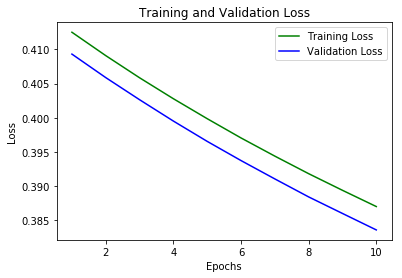

In [415]:
history_dict6 = history6.history
loss_values6 = history_dict6['loss']
val_loss_values6 = history_dict6['val_loss']

epochs6 = range(1, len(loss_values6) + 1)
plt.plot(epochs6, loss_values6, 'green', label='Training Loss')
plt.plot(epochs6, val_loss_values6, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

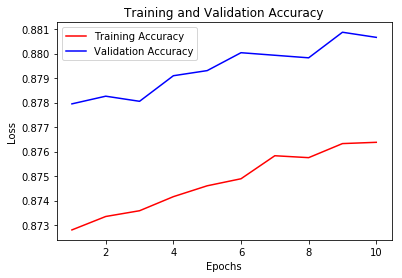

In [416]:
acc_values6 = history_dict6['acc'] 
val_acc_values6 = history_dict6['val_acc']

plt.plot(epochs6, acc_values6, 'red', label='Training Accuracy')
plt.plot(epochs6, val_acc_values6, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [417]:
model6_train_loss, model6_train_acc = model6.evaluate(X_train, y_train)
print(f'Model 6 Train Loss:      {(model6_train_loss * 100):.4}%')
print(f'Model 6 Train Accuracy:  {(model6_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 17us/step
Model 6 Train Loss:      38.53%
Model 6 Train Accuracy:  87.73%


In [418]:
model6_test_loss, model6_test_acc = model6.evaluate(X_test, y_test)
print(f'Model 6 Test Loss:      {(model6_test_loss * 100):.4}%')
print(f'Model 6 Test Accuracy:  {(model6_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 19us/step
Model 6 Test Loss:      38.55%
Model 6 Test Accuracy:  87.81%


In [419]:
model6_hat_test = model6.predict(X_test)

AUC: 0.94365


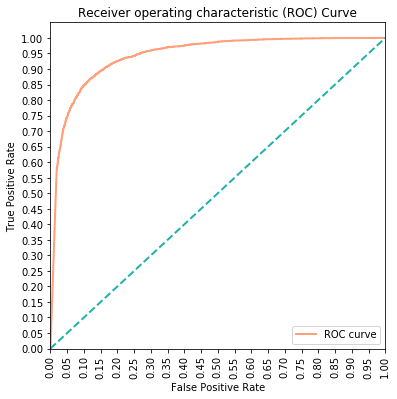

In [420]:
fpr, tpr, thresholds = roc_curve(y_test, model6_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [539]:
score_NN6 = ['NN: SGD Optimizer', model6_train_acc, model6_test_acc]
models = models.append([score_NN6])

### Neural Network Model 7: SGD With More Epochs

In [421]:
model7 = models.Sequential()

model7.add(layers.Dense(12, 
                       kernel_initializer='uniform', 
                       activation='relu', 
                       input_shape=(X_train.shape[1],)))
model7.add(layers.Dense(7, 
                        kernel_regularizer=regularizers.l1(0.005),
                        activation='relu'))
model7.add(layers.Dense(7, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))

In [422]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 12)                1020      
_________________________________________________________________
dense_62 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_63 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 7         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [423]:
model7.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [424]:
history7 = model7.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_split=0.2)

Train on 38311 samples, validate on 9578 samples
Epoch 1/40
38311/38311 [==============================] - 1s 33us/step - loss: 0.7951 - acc: 0.5997 - val_loss: 0.7758 - val_acc: 0.5913
Epoch 2/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.7550 - acc: 0.5997 - val_loss: 0.7379 - val_acc: 0.5913
Epoch 3/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.7159 - acc: 0.5997 - val_loss: 0.6974 - val_acc: 0.5913
Epoch 4/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.6744 - acc: 0.5997 - val_loss: 0.6551 - val_acc: 0.5913
Epoch 5/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.6345 - acc: 0.7242 - val_loss: 0.6187 - val_acc: 0.7948
Epoch 6/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.6025 - acc: 0.8073 - val_loss: 0.5905 - val_acc: 0.8240
Epoch 7/40
38311/38311 [==============================] - 0s 5us/step - loss: 0.5772 - acc: 0.8294 - val_loss: 0.5677 - val_acc: 0.840

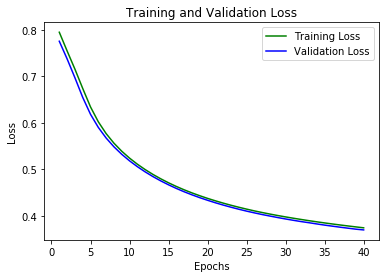

In [425]:
history_dict7 = history7.history
loss_values7 = history_dict7['loss']
val_loss_values7 = history_dict7['val_loss']

epochs7 = range(1, len(loss_values7) + 1)
plt.plot(epochs7, loss_values7, 'green', label='Training Loss')
plt.plot(epochs7, val_loss_values7, 'blue', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

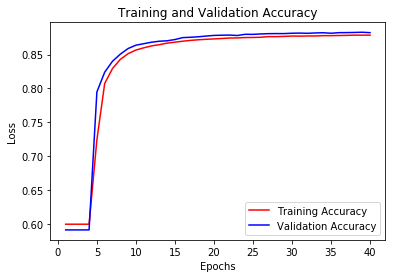

In [426]:
acc_values7 = history_dict7['acc'] 
val_acc_values7 = history_dict7['val_acc']

plt.plot(epochs7, acc_values7, 'red', label='Training Accuracy')
plt.plot(epochs7, val_acc_values7, 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [427]:
model7_train_loss, model7_train_acc = model7.evaluate(X_train, y_train)
print(f'Model 7 Train Loss:      {(model7_train_loss * 100):.4}%')
print(f'Model 7 Train Accuracy:  {(model7_train_acc * 100):.4}%')

47889/47889 [==============================] - 1s 19us/step
Model 7 Train Loss:      37.29%
Model 7 Train Accuracy:  87.98%


In [428]:
model7_test_loss, model7_test_acc = model7.evaluate(X_test, y_test)
print(f'Model 7 Test Loss:      {(model7_test_loss * 100):.4}%')
print(f'Model 7 Test Accuracy:  {(model7_test_acc * 100):.4}%')

11973/11973 [==============================] - 0s 19us/step
Model 7 Test Loss:      37.47%
Model 7 Test Accuracy:  87.95%


In [429]:
model7_hat_test = model7.predict(X_test)

AUC: 0.94668


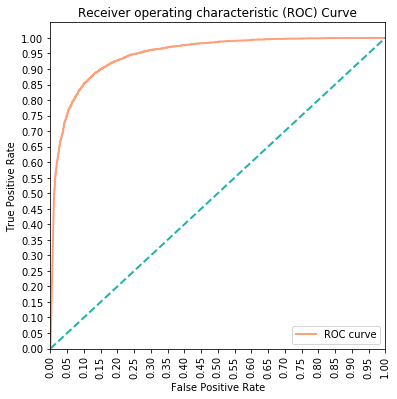

In [430]:
fpr, tpr, thresholds = roc_curve(y_test, model7_hat_test)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='lightsalmon',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightseagreen', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)], rotation=90)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [540]:
score_NN7 = ['NN: SGD Optimizer, Added Epochs', model7_train_acc, model7_test_acc]
models = models.append([score_NN7])

### Comparing the Models

In [542]:
models.columns = ['Model', 'Training Accuracy', 'Testing Accuracy']
models.set_index(['Model'], inplace=True)

models

,Training Accuracy,Testing Accuracy
Model,,
Logistic Regression,0.883021,0.881149
XGBoost,0.879095,0.881066
Baseline NN,0.884525,0.883070
NN: L1 Regularization,0.881852,0.878727
NN: L2 Regularization,0.881852,0.881149
NN: Dropout Regularization,0.883606,0.881316
NN: Dropping Features,0.881664,0.882152
NN: SGD Optimizer,0.877341,0.878059
"NN: SGD Optimizer, Added Epochs",0.879785,0.879479


In [543]:
# Sorted by testing accuracy

models.sort_values(['Testing Accuracy'], ascending=False)

,Training Accuracy,Testing Accuracy
Model,,
Baseline NN,0.884525,0.883070
NN: Dropping Features,0.881664,0.882152
NN: Dropout Regularization,0.883606,0.881316
Logistic Regression,0.883021,0.881149
NN: L2 Regularization,0.881852,0.881149
XGBoost,0.879095,0.881066
"NN: SGD Optimizer, Added Epochs",0.879785,0.879479
NN: L1 Regularization,0.881852,0.878727
NN: SGD Optimizer,0.877341,0.878059


## Interpretation and Conclusions

The best predictor was the baseline neural network, providing a predictive accuracy of 88.31%.

The feature importance ranking results from the Logistic Regression and XGBoost shared these top factors in predicting sex:
* Height
* Body Type: Curvy, Full Figured, Thin
* Job: Construction/Craftsmanship, Computer/Hardware/Software, Science/Tech/Engineering

It is interesting that the top body type descriptors are more representative of the female users, and the top job descriptors are more representative of the male users.

As we saw in our t-test earlier, we can predict with over 99% confidence that males on OkCupid are taller than females on average. From our data, the difference between the mean male height (5'10") and the mean female height (5'4") is 6 inches.

## Further Work
* Tune the models more after dropping features
* Do more reseach on ethnicity
* Gather data on factors that lead to profile visits and matches
* Get full essay answers to look for trends in what people write themselves